# RESOLUÇÃO CASE - PARANÁ BANCO

### Henrique S. Guerra 

---


## **PARTE 1**: Faça uma análise inicial dos dados: você encontrou algum problema? Como você trataria estes problemas?



### Importando e entendendo a base de dados 

Importando as bibliotecas 

In [1]:
# Importando bibliotecas de interesse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importando a base de dados utilizando read_csv() e usando a função .head() para visualizar as primeiras observações do dataframe 

In [2]:
df = pd.read_csv('/home/programacao/Documentos/processos seletivos/parana banco/dados_operacoes.csv')

df.head(10)

,id,contrato,data_operacao,nascimento,idade,genero,bairro,cidade,estado,cep,...,empregador,operacao,valor_principal,parcelas,quantidade_parcelas,parcelas_pagas,quantidade_parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto
0,682e8b505c30bb12052f9457516dc47e7eafc8ed,1760865030954,2019-09-13,1974-06-08,48,F,Conjunto Paulo Vi,Moreira,Rio de Janeiro,XXXXX-685,...,e53d5342e82e0ce6061bc3aaea1a986f24a73613,Prod,27810.69,100,100,20,20,1.46493,531.56,53156.0000
1,45ad9d444a276407df8b6f47c0fcc5b127dadaaa,6023030871505,2022-11-03,1988-07-23,34,F,Minas Caixa,da Mota de Azevedo,Amapá,XXXXX735,...,f715ffaf2c8294df43df3357c6a37f04b900fb06,Refin,9589.96,40,40,6,6,4.53587,523.82,20952.8000
2,81cec74ea2ca41535fee03daeb410ddbdf12906a,560263027614,2021-06-13,1975-08-17,Null,Null,Vila Mantiqueira,Rocha da Prata,Santa Catarina,XXXXX863,...,da9515ffa45dd12791be0941b91188e51fe1cc04,Prod,42963.20,100,100,10,10,1.44749,815.71,81571.0000
3,4e987d9178e2dcb07c2bf3878736233a676a0a87,1397061435926,2021-08-30,1982-08-17,40,F,Anchieta,da Mata,Null,Null,...,0c1741dc26339e6af3e4b6badcf984d383d1ca44,Port + Refin,2954.14,120,120,6,6,1.82904,60.96,7315.1997
4,595943ecdb32a24ccb6ef374b6d865f3b60d7130,3823566005671,2022-11-16,1985-07-14,37,F,Conjunto Floramar,Moreira de Goiás,Mato Grosso,XXXXX384,...,f97b240dc24290c19e717d7a654747aa31722ad3,Prod,31186.17,100,100,10,10,3.28340,1066.11,106611.0000
5,5e45a621fbb7998f7588091f8b7d480d3b24b2fc,5444678845030,2020-11-02,1984-05-29,38,M,Vila Fumec,Campos,Roraima,Null,...,Null,Port + Refin,41432.39,40,40,8,8,0.70787,1193.00,47720.0000
6,a31aba3a584cedd544a31cfe3af96a0dc06bad17,9023412229198,2019-11-22,1997-02-10,26,M,Null,Null,Pernambuco,XXXXX-022,...,25474923a0bac6ed841e0b776b035c73c444da1f,Prod,16870.66,60,60,9,9,1.13080,388.80,23328.0000
7,b0798e02f03eb1ad4ef5a8cbbc69e2732a7052d0,4167168660296,2021-12-08,1997-10-18,25,F,Vila Da Ária,Araújo,Alagoas,XXXXX007,...,8e9e183c401487c93eb9c9127d15e0908208d252,Refin,2832.39,80,80,12,12,2.67154,86.12,6889.6000
8,1676c0f980840a4fb7d808fc831412e8cc0c1b29,7565583960651,2022-08-18,1984-06-17,38,M,Vila Tirol,Campos,Alagoas,XXXXX935,...,ecfeed45ad3c07bc0533b71937ff3fb0be094a12,Prod,22710.72,40,40,10,10,3.64272,1087.15,43486.0000
9,3411c0726cfae279d32d3a6a1d1c8a8fc560ffd5,7872966313608,2019-12-04,1999-11-17,23,M,Nossa Senhora Do Rosário,Fogaça,Ceará,XXXXX304,...,8032e14ec79691c862249d17e0050d7da49913b9,Prod,18878.32,40,40,0,0,0.99986,574.94,22997.6000


Visualizando os tipos de dados de cada coluna

In [3]:
# Verificando os tipos de dados de cada coluna
tipos_de_dados = df.dtypes
print("Tipos de dados por coluna:")
print(tipos_de_dados)


Tipos de dados por coluna:
id                            object
contrato                       int64
data_operacao                 object
nascimento                    object
idade                         object
genero                        object
bairro                        object
cidade                        object
estado                        object
cep                           object
telefone                      object
cartao                        object
email                         object
ocupacao                      object
empregador                    object
operacao                      object
valor_principal              float64
parcelas                       int64
quantidade_parcelas            int64
parcelas_pagas                 int64
quantidade_parcelas_pagas      int64
taxa_contrato                float64
valor_parcela                float64
valor_bruto                  float64
dtype: object


Notamos que alguns campos estão com tipos incorretos. Vamos arrumar isso:


In [4]:
# Transformando a coluna "idade" de int64 para object
df['contrato'] = df['contrato'].astype(str)

# transformando coluna "nascimento" em tipo "date"
df['nascimento'] = pd.to_datetime(df['nascimento'])

# transformando coluna "data_operacao" em tipo "date"
df['data_operacao'] = pd.to_datetime(df['data_operacao'])

#df['idade'] = df['idade'].astype(int)

O campo "idade" teve um erro ao "consertar" seu tipo. Isso ocorreu pois existem alguns valores imputados com "Null" no campo

Vamos verificar os valores faltantes de cada coluna:

In [5]:
# Verificando valores faltantes em todas as colunas
valores_faltantes = df.isnull().sum()
print("Valores faltantes por coluna:")
print(valores_faltantes)


Valores faltantes por coluna:
id                           0
contrato                     0
data_operacao                0
nascimento                   0
idade                        0
genero                       0
bairro                       0
cidade                       0
estado                       0
cep                          0
telefone                     0
cartao                       0
email                        0
ocupacao                     0
empregador                   0
operacao                     0
valor_principal              0
parcelas                     0
quantidade_parcelas          0
parcelas_pagas               0
quantidade_parcelas_pagas    0
taxa_contrato                0
valor_parcela                0
valor_bruto                  0
dtype: int64


É possível notar que existe diversos valores faltantes em algumas colunas, mas ao mostrar o total, aparecem "0" NAs. Isso pode estar ocorrendo pois ao invés de exister valores não preenchidos, esses valores estão preenchidos como "Null". Vamos substiruir esses valores "Null" por NaN

In [6]:
# Substituir "Null" por NaN em todo o DataFrame
df.replace("Null", np.nan, inplace=True)

# Verificar o total de valores faltantes por coluna
total_null = df.isnull().sum()
print("Total de 'Null' por coluna:")
print(total_null)


Total de 'Null' por coluna:
id                              0
contrato                        0
data_operacao                   0
nascimento                      0
idade                        3005
genero                       1487
bairro                       2539
cidade                       2831
estado                       2234
cep                          3754
telefone                     4655
cartao                       5279
email                        4667
ocupacao                     2271
empregador                   3124
operacao                        0
valor_principal                 0
parcelas                        0
quantidade_parcelas             0
parcelas_pagas                  0
quantidade_parcelas_pagas       0
taxa_contrato                   0
valor_parcela                   0
valor_bruto                     0
dtype: int64


Podemos notar que as colunas que apresentam valores faltantes são colunas de informações referentes aos clientes e não as transações. Como a coluna ID é uma chave de cada usuário, podemos utilizá-la como chave para substituir valores das colunas que tem valores faltantes (Essas colunas poderão nem ser utilizadas nas nossas análises,  mas é sempre interessante corrigir o máximo de informações possíveis).

In [7]:
# Substituindo valores faltantes em 'idade' com base nos valores da coluna de chave 'id' . Vamos fazer isso para todas as colunas com informações dos clientes
mapeamento_idade = df.groupby('id')['idade'].first().to_dict()
df['idade'] = df['idade'].fillna(df['id'].map(mapeamento_idade))

mapeamento_idade = df.groupby('id')['genero'].first().to_dict()
df['genero'] = df['genero'].fillna(df['id'].map(mapeamento_idade))

mapeamento_idade = df.groupby('id')['bairro'].first().to_dict()
df['bairro'] = df['bairro'].fillna(df['id'].map(mapeamento_idade))

mapeamento_idade = df.groupby('id')['cidade'].first().to_dict()
df['cidade'] = df['cidade'].fillna(df['id'].map(mapeamento_idade))

mapeamento_idade = df.groupby('id')['estado'].first().to_dict()
df['estado'] = df['estado'].fillna(df['id'].map(mapeamento_idade))

mapeamento_idade = df.groupby('id')['cep'].first().to_dict()
df['cep'] = df['cep'].fillna(df['id'].map(mapeamento_idade))

mapeamento_idade = df.groupby('id')['telefone'].first().to_dict()
df['telefone'] = df['telefone'].fillna(df['id'].map(mapeamento_idade))

mapeamento_idade = df.groupby('id')['cartao'].first().to_dict()
df['cartao'] = df['cartao'].fillna(df['id'].map(mapeamento_idade))

mapeamento_idade = df.groupby('id')['email'].first().to_dict()
df['email'] = df['email'].fillna(df['id'].map(mapeamento_idade))

mapeamento_idade = df.groupby('id')['ocupacao'].first().to_dict()
df['ocupacao'] = df['ocupacao'].fillna(df['id'].map(mapeamento_idade))

mapeamento_idade = df.groupby('id')['empregador'].first().to_dict()
df['empregador'] = df['empregador'].fillna(df['id'].map(mapeamento_idade))

In [8]:
# Verificando o total de valores faltantes por coluna
total_null = df.isnull().sum()
print("Total de 'Null' por coluna:")
print(total_null)

Total de 'Null' por coluna:
id                             0
contrato                       0
data_operacao                  0
nascimento                     0
idade                        400
genero                       214
bairro                       377
cidade                       407
estado                       288
cep                          597
telefone                     780
cartao                       913
email                        766
ocupacao                     322
empregador                   489
operacao                       0
valor_principal                0
parcelas                       0
quantidade_parcelas            0
parcelas_pagas                 0
quantidade_parcelas_pagas      0
taxa_contrato                  0
valor_parcela                  0
valor_bruto                    0
dtype: int64


Podemos notar que agora o total de valores faltantes nas colunas com informações dos clientes reduziu consideravelmente. Ainda podemos considerar atualizar dados de idade com base na data de nascimento. Observando a base em excel, vi que o "dia atual" em que a base foi consultada foi dia "22/03/2023", portanto podemos atualizar alguns dados baseado na data de nascimento:

In [9]:
df.head(90)

,id,contrato,data_operacao,nascimento,idade,genero,bairro,cidade,estado,cep,...,empregador,operacao,valor_principal,parcelas,quantidade_parcelas,parcelas_pagas,quantidade_parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto
0,682e8b505c30bb12052f9457516dc47e7eafc8ed,1760865030954,2019-09-13,1974-06-08,48,F,Conjunto Paulo Vi,Moreira,Rio de Janeiro,XXXXX-685,...,e53d5342e82e0ce6061bc3aaea1a986f24a73613,Prod,27810.69,100,100,20,20,1.46493,531.56,53156.0000
1,45ad9d444a276407df8b6f47c0fcc5b127dadaaa,6023030871505,2022-11-03,1988-07-23,34,F,Minas Caixa,da Mota de Azevedo,Amapá,XXXXX735,...,f715ffaf2c8294df43df3357c6a37f04b900fb06,Refin,9589.96,40,40,6,6,4.53587,523.82,20952.8000
2,81cec74ea2ca41535fee03daeb410ddbdf12906a,560263027614,2021-06-13,1975-08-17,47,M,Vila Mantiqueira,Rocha da Prata,Santa Catarina,XXXXX863,...,da9515ffa45dd12791be0941b91188e51fe1cc04,Prod,42963.20,100,100,10,10,1.44749,815.71,81571.0000
3,4e987d9178e2dcb07c2bf3878736233a676a0a87,1397061435926,2021-08-30,1982-08-17,40,F,Anchieta,da Mata,Santa Catarina,XXXXX-428,...,0c1741dc26339e6af3e4b6badcf984d383d1ca44,Port + Refin,2954.14,120,120,6,6,1.82904,60.96,7315.1997
4,595943ecdb32a24ccb6ef374b6d865f3b60d7130,3823566005671,2022-11-16,1985-07-14,37,F,Conjunto Floramar,Moreira de Goiás,Mato Grosso,XXXXX384,...,f97b240dc24290c19e717d7a654747aa31722ad3,Prod,31186.17,100,100,10,10,3.28340,1066.11,106611.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,3d80f52e4465f37f623f8daeef525a7c2cf842fd,8519096944195,2019-10-17,1989-01-03,34,F,Senhor Dos Passos,Gonçalves,Espírito Santo,None,...,d0edfb6e8c55c8742a83f0f192886e0e15fa0347,Prod,12889.44,40,40,6,6,1.40253,423.23,16929.2010
86,17fdbf15b69f432b250802a95637551ae8f5a043,4047730367016,2022-12-04,1986-07-23,36,F,Mariano De Abreu,Souza de Minas,Mato Grosso do Sul,XXXXX-061,...,bfaa8e41cdc214da9e224ccb8025834980174b18,Refin,9329.44,80,80,4,4,3.58451,355.67,28453.6020
87,6b368ef1d25a5d74277e548634fbcd29f8916a1b,6556583809355,2021-10-14,1994-09-29,28,F,Inconfidência,Barros,Amazonas,XXXXX398,...,b7dd576e0e85df64f5c69b9e073863da3ee8fe33,Refin,9862.70,40,40,6,6,1.18455,311.01,12440.4000
88,6a73d45aee5df4facabc94a9f55d0901c16ae33f,9795305372013,2022-09-06,1999-05-31,23,M,Olhos D'água,Azevedo Paulista,Minas Gerais,XXXXX290,...,7e881ac8adb254773b5bab2f594de0afb375757a,Prod,27648.15,40,40,10,10,2.94403,1185.33,47413.2000


Aqui notamos que, por exemplo, a observação "89" possui um valor faltante para idade. Vamos aplicar a função que conserta isso e depois verificar se ela corrigiu corretamente:

In [10]:
# Definindo o dia atual como 22/03/2024
dia_atual = pd.to_datetime('2023-03-22')

# Calculando a idade apenas para os valores faltantes
df['idade'] = df.apply(lambda x: (dia_atual - x['nascimento']).days // 365 if pd.isnull(x['idade']) else x['idade'], axis=1)


In [11]:
df.head(90)

,id,contrato,data_operacao,nascimento,idade,genero,bairro,cidade,estado,cep,...,empregador,operacao,valor_principal,parcelas,quantidade_parcelas,parcelas_pagas,quantidade_parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto
0,682e8b505c30bb12052f9457516dc47e7eafc8ed,1760865030954,2019-09-13,1974-06-08,48,F,Conjunto Paulo Vi,Moreira,Rio de Janeiro,XXXXX-685,...,e53d5342e82e0ce6061bc3aaea1a986f24a73613,Prod,27810.69,100,100,20,20,1.46493,531.56,53156.0000
1,45ad9d444a276407df8b6f47c0fcc5b127dadaaa,6023030871505,2022-11-03,1988-07-23,34,F,Minas Caixa,da Mota de Azevedo,Amapá,XXXXX735,...,f715ffaf2c8294df43df3357c6a37f04b900fb06,Refin,9589.96,40,40,6,6,4.53587,523.82,20952.8000
2,81cec74ea2ca41535fee03daeb410ddbdf12906a,560263027614,2021-06-13,1975-08-17,47,M,Vila Mantiqueira,Rocha da Prata,Santa Catarina,XXXXX863,...,da9515ffa45dd12791be0941b91188e51fe1cc04,Prod,42963.20,100,100,10,10,1.44749,815.71,81571.0000
3,4e987d9178e2dcb07c2bf3878736233a676a0a87,1397061435926,2021-08-30,1982-08-17,40,F,Anchieta,da Mata,Santa Catarina,XXXXX-428,...,0c1741dc26339e6af3e4b6badcf984d383d1ca44,Port + Refin,2954.14,120,120,6,6,1.82904,60.96,7315.1997
4,595943ecdb32a24ccb6ef374b6d865f3b60d7130,3823566005671,2022-11-16,1985-07-14,37,F,Conjunto Floramar,Moreira de Goiás,Mato Grosso,XXXXX384,...,f97b240dc24290c19e717d7a654747aa31722ad3,Prod,31186.17,100,100,10,10,3.28340,1066.11,106611.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,3d80f52e4465f37f623f8daeef525a7c2cf842fd,8519096944195,2019-10-17,1989-01-03,34,F,Senhor Dos Passos,Gonçalves,Espírito Santo,None,...,d0edfb6e8c55c8742a83f0f192886e0e15fa0347,Prod,12889.44,40,40,6,6,1.40253,423.23,16929.2010
86,17fdbf15b69f432b250802a95637551ae8f5a043,4047730367016,2022-12-04,1986-07-23,36,F,Mariano De Abreu,Souza de Minas,Mato Grosso do Sul,XXXXX-061,...,bfaa8e41cdc214da9e224ccb8025834980174b18,Refin,9329.44,80,80,4,4,3.58451,355.67,28453.6020
87,6b368ef1d25a5d74277e548634fbcd29f8916a1b,6556583809355,2021-10-14,1994-09-29,28,F,Inconfidência,Barros,Amazonas,XXXXX398,...,b7dd576e0e85df64f5c69b9e073863da3ee8fe33,Refin,9862.70,40,40,6,6,1.18455,311.01,12440.4000
88,6a73d45aee5df4facabc94a9f55d0901c16ae33f,9795305372013,2022-09-06,1999-05-31,23,M,Olhos D'água,Azevedo Paulista,Minas Gerais,XXXXX290,...,7e881ac8adb254773b5bab2f594de0afb375757a,Prod,27648.15,40,40,10,10,2.94403,1185.33,47413.2000


Podemos notar que a idade da observação 89 está corrigida corretamente. Agora vamos verificar se sobrou algum valor faltante:

In [12]:
# Verificand o total de valores faltantes por coluna
total_null = df.isnull().sum()
print("Total de 'Null' por coluna:")
print(total_null)

Total de 'Null' por coluna:
id                             0
contrato                       0
data_operacao                  0
nascimento                     0
idade                          0
genero                       214
bairro                       377
cidade                       407
estado                       288
cep                          597
telefone                     780
cartao                       913
email                        766
ocupacao                     322
empregador                   489
operacao                       0
valor_principal                0
parcelas                       0
quantidade_parcelas            0
parcelas_pagas                 0
quantidade_parcelas_pagas      0
taxa_contrato                  0
valor_parcela                  0
valor_bruto                    0
dtype: int64


Notamos que não existem mais dados faltantes na coluna idade. Agora vamos arrumar o tipo da coluna (de object para int64)

In [13]:
df['idade'] = df['idade'].astype(int)

In [14]:
tipos_de_dados = df.dtypes
print("Tipos de dados por coluna:")
print(tipos_de_dados)

Tipos de dados por coluna:
id                                   object
contrato                             object
data_operacao                datetime64[ns]
nascimento                   datetime64[ns]
idade                                 int64
genero                               object
bairro                               object
cidade                               object
estado                               object
cep                                  object
telefone                             object
cartao                               object
email                                object
ocupacao                             object
empregador                           object
operacao                             object
valor_principal                     float64
parcelas                              int64
quantidade_parcelas                   int64
parcelas_pagas                        int64
quantidade_parcelas_pagas             int64
taxa_contrato                       float64
valor

Vamos ver uma análise descritiva dos campos numéricos

In [15]:
# código com descrição das variáveis numéricas 
df.describe()

,data_operacao,nascimento,idade,valor_principal,parcelas,quantidade_parcelas,parcelas_pagas,quantidade_parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto
count,14895,14895,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000
mean,2021-03-19 01:18:01.087613184,1986-02-28 07:51:41.148036288,36.556294,23185.875466,68.224236,68.224236,15.739040,15.739040,2.134701,724.267448,47446.568597
min,2019-01-01 00:00:00,1970-01-03 00:00:00,21.000000,203.550000,40.000000,40.000000,0.000000,0.000000,0.347370,3.050000,252.400000
25%,2020-03-30 00:00:00,1978-01-24 12:00:00,28.000000,12484.045000,40.000000,40.000000,6.000000,6.000000,1.023490,336.700000,20689.500000
50%,2021-05-12 00:00:00,1986-05-07 00:00:00,36.000000,20256.790000,60.000000,60.000000,9.000000,9.000000,1.793700,601.640000,38220.000000
75%,2022-03-14 00:00:00,1994-04-23 00:00:00,45.000000,34651.280000,90.000000,90.000000,18.000000,18.000000,3.019275,1007.655000,61545.198000
max,2022-12-30 00:00:00,2001-12-22 00:00:00,53.000000,49995.020000,120.000000,120.000000,108.000000,108.000000,6.461680,3063.990000,367678.800000
std,NaN,NaN,9.323385,13500.843754,27.128264,27.128264,17.519803,17.519803,1.341172,515.074503,39877.201593


Notamos que existem colunas que parecem duplicadas:

"parcelas" e "quantidade_parcelas" 
"parcelas_pagas" e "quantidade_parcelas_pagas"

Vamos confirmar isso

In [16]:
# Verificando se as duas colunas estão duplicadas
duplicadas_parcelas = df.duplicated(subset=['parcelas', 'quantidade_parcelas'], keep=False)

if duplicadas_parcelas.any():
    print("As colunas estão duplicadas.")
else:
    print("As colunas não estão duplicadas.")

duplicadas_parcelas_pagas = df.duplicated(subset=['parcelas_pagas', 'quantidade_parcelas_pagas'], keep=False)

if duplicadas_parcelas_pagas.any():
    print("As colunas estão duplicadas.")
else:
    print("As colunas não estão duplicadas.")


As colunas estão duplicadas.
As colunas estão duplicadas.


Portanto existem duas colunas duplicadas. Vamos remover elas e criar um novo data frame "arrumado"


In [17]:
df_arrumado = df.drop(columns=['quantidade_parcelas', 'quantidade_parcelas_pagas'])
df_arrumado.head(10)

,id,contrato,data_operacao,nascimento,idade,genero,bairro,cidade,estado,cep,...,email,ocupacao,empregador,operacao,valor_principal,parcelas,parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto
0,682e8b505c30bb12052f9457516dc47e7eafc8ed,1760865030954,2019-09-13,1974-06-08,48,F,Conjunto Paulo Vi,Moreira,Rio de Janeiro,XXXXX-685,...,XXXXa51@mXXXXXXXXXXXX,Espeleologista,e53d5342e82e0ce6061bc3aaea1a986f24a73613,Prod,27810.69,100,20,1.46493,531.56,53156.0000
1,45ad9d444a276407df8b6f47c0fcc5b127dadaaa,6023030871505,2022-11-03,1988-07-23,34,F,Minas Caixa,da Mota de Azevedo,Amapá,XXXXX735,...,XXXXXXXXXXXnda@tXXXXXXXXXXXX,Mágico,f715ffaf2c8294df43df3357c6a37f04b900fb06,Refin,9589.96,40,6,4.53587,523.82,20952.8000
2,81cec74ea2ca41535fee03daeb410ddbdf12906a,560263027614,2021-06-13,1975-08-17,47,M,Vila Mantiqueira,Rocha da Prata,Santa Catarina,XXXXX863,...,XXXXXXXXXXXXXXs52@oXXXXXXXXXXX,Arqueólogo,da9515ffa45dd12791be0941b91188e51fe1cc04,Prod,42963.20,100,10,1.44749,815.71,81571.0000
3,4e987d9178e2dcb07c2bf3878736233a676a0a87,1397061435926,2021-08-30,1982-08-17,40,F,Anchieta,da Mata,Santa Catarina,XXXXX-428,...,XXXXXXo25@mXXXXXXXXXXXX,Conferente de carga e descarga,0c1741dc26339e6af3e4b6badcf984d383d1ca44,Port + Refin,2954.14,120,6,1.82904,60.96,7315.1997
4,595943ecdb32a24ccb6ef374b6d865f3b60d7130,3823566005671,2022-11-16,1985-07-14,37,F,Conjunto Floramar,Moreira de Goiás,Mato Grosso,XXXXX384,...,XXXXXXiro@mXXXXXXXXXXXX,Treinador,f97b240dc24290c19e717d7a654747aa31722ad3,Prod,31186.17,100,10,3.28340,1066.11,106611.0000
5,5e45a621fbb7998f7588091f8b7d480d3b24b2fc,5444678845030,2020-11-02,1984-05-29,38,M,Vila Fumec,Campos,Roraima,XXXXX811,...,"XXXXXXira@bXXXXXXXXXX, @yXXXXXXXXXXXX",Cirurgião bucal,60e1595fb0afb5b56bcac3853e51a27fed2f4b73,Port + Refin,41432.39,40,8,0.70787,1193.00,47720.0000
6,a31aba3a584cedd544a31cfe3af96a0dc06bad17,9023412229198,2019-11-22,1997-02-10,26,M,Novo Santa Cecilia,da Cunha,Pernambuco,XXXXX-022,...,XXXmos@gXXXXXXXX,Produtor de audio visual,25474923a0bac6ed841e0b776b035c73c444da1f,Prod,16870.66,60,9,1.13080,388.80,23328.0000
7,b0798e02f03eb1ad4ef5a8cbbc69e2732a7052d0,4167168660296,2021-12-08,1997-10-18,25,F,Vila Da Ária,Araújo,Alagoas,XXXXX007,...,XXXXXXXXXXXXXara@aXXXXXXXXXXXX,Velejador,8e9e183c401487c93eb9c9127d15e0908208d252,Refin,2832.39,80,12,2.67154,86.12,6889.6000
8,1676c0f980840a4fb7d808fc831412e8cc0c1b29,7565583960651,2022-08-18,1984-06-17,38,M,Vila Tirol,Campos,Alagoas,XXXXX935,...,XXXXXXXXlyn@pXXXXXXXXXXXX,Soldado,ecfeed45ad3c07bc0533b71937ff3fb0be094a12,Prod,22710.72,40,10,3.64272,1087.15,43486.0000
9,3411c0726cfae279d32d3a6a1d1c8a8fc560ffd5,7872966313608,2019-12-04,1999-11-17,23,M,Nossa Senhora Do Rosário,Fogaça,Ceará,XXXXX304,...,XXXXXXXXcia@aXXXXXXXXXXXX,None,8032e14ec79691c862249d17e0050d7da49913b9,Prod,18878.32,40,0,0.99986,574.94,22997.6000


### Finalizando a primeira questão, listo abaixo alguns problemas encontrados na base de dados original e como lidados com eles:

* Tipos de dados incorretos nas colunas "contrato", "data_operacao" e "nascimento" e "idade": para isso apenas alteramos o "type" dessas colunas.
    * No caso da coluna idade, como apresentava valores faltantes, primeiro precisamos substiuí-los usando a chave do cliente para achar valores já preenchidos da idade em outras operações e vimos que ainda assim existiam alguns valores faltantes e, para corrigir, descobrimos a "data atual" em que a base foi consultada através da idade dos clientes e fizemos uma conta (data atual - nascimento) para preencher os campos faltantes da coluna idade;
* Observamos outras colunas de informações dos clientes faltantes ("genero", "bairro", "cidade"...) e também utilizamos a chave "id" do cliente para substituir o máximo de valores faltantes possísveis;
* Observamos também a duplicação de colunas do total de parcelas e do total de parcelas pagas: para isso removemos uma das colunas duplicadas e criamos uma nova base com os dados corrigidos chamada de "df_arrumado"

---

## **PARTE 2**: Faça uma análise exploratória dos dados: distribuições de variáveis, outliers, correlações, etc.

Para começar a análise descritiva, primeiramente vamos ver a frequência de algumas variáveis categóricas ("genero", "estado" e "operação")

In [18]:
# frequência da variável "gênero"
print("Frequência de gênero:")
print(df_arrumado['genero'].value_counts())

# requência da variável "Estado"
print("\nFrequência de Estado:")
print(df_arrumado['estado'].value_counts())

# frequência da variável "operação"
print("\nFrequência de operação:")
print(df_arrumado['operacao'].value_counts())

total_observacoes = df.shape[0]

# Calculando a porcentagem de cada categoria sobre o total
porcentagem_operacao = (df_arrumado['operacao'].value_counts() / total_observacoes) * 100

print("Porcentagem de cada categoria de operação sobre o total:")
print(porcentagem_operacao)



Frequência de gênero:
genero
F    9639
M    5042
Name: count, dtype: int64

Frequência de Estado:
estado
Acre                   597
Rio Grande do Sul      582
Rio de Janeiro         579
São Paulo              567
Alagoas                565
Espírito Santo         563
Ceará                  562
Pernambuco             560
Sergipe                555
Amapá                  555
Rondônia               555
Pará                   555
Piauí                  553
Paraíba                552
Rio Grande do Norte    545
Bahia                  543
Minas Gerais           538
Mato Grosso            537
Paraná                 532
Goiás                  528
Roraima                523
Distrito Federal       519
Santa Catarina         503
Amazonas               501
Tocantins              497
Mato Grosso do Sul     483
Maranhão               458
Name: count, dtype: int64

Frequência de operação:
operacao
Prod            8925
Refin           4431
Port + Refin    1539
Name: count, dtype: int64
Porcentagem de ca

### Aqui podemos notar algumas coisas como:

* A base apresenta quase o dobro de operações feitas por pessoas do gênero Feminino em comparação com o gênero Masculino
* Existe uma quantidade muito próxima de operações para todos os Estados do país
* Para o campo "operacao" podemos notar que quase 60% das operações são da categoria "Prod" (entendo que devem ser novas operaçẽos de clientes), quase 30% na categoria "Refin" (entendo que devem ser operações de refinanciamento, onde os clientes podem renegociar as condições do empreśtimo) e pouco mais de 10% são da categoria "Port + Refin" (entendo que devem ser operações de portabildade e refinanciamento do empréstimo vindo de uma provável outra instituição)

### Agora vamos criar boxplots para entender as distribuições das variáveis numéricas e criar uma tabela com as principais variáveis descritivas

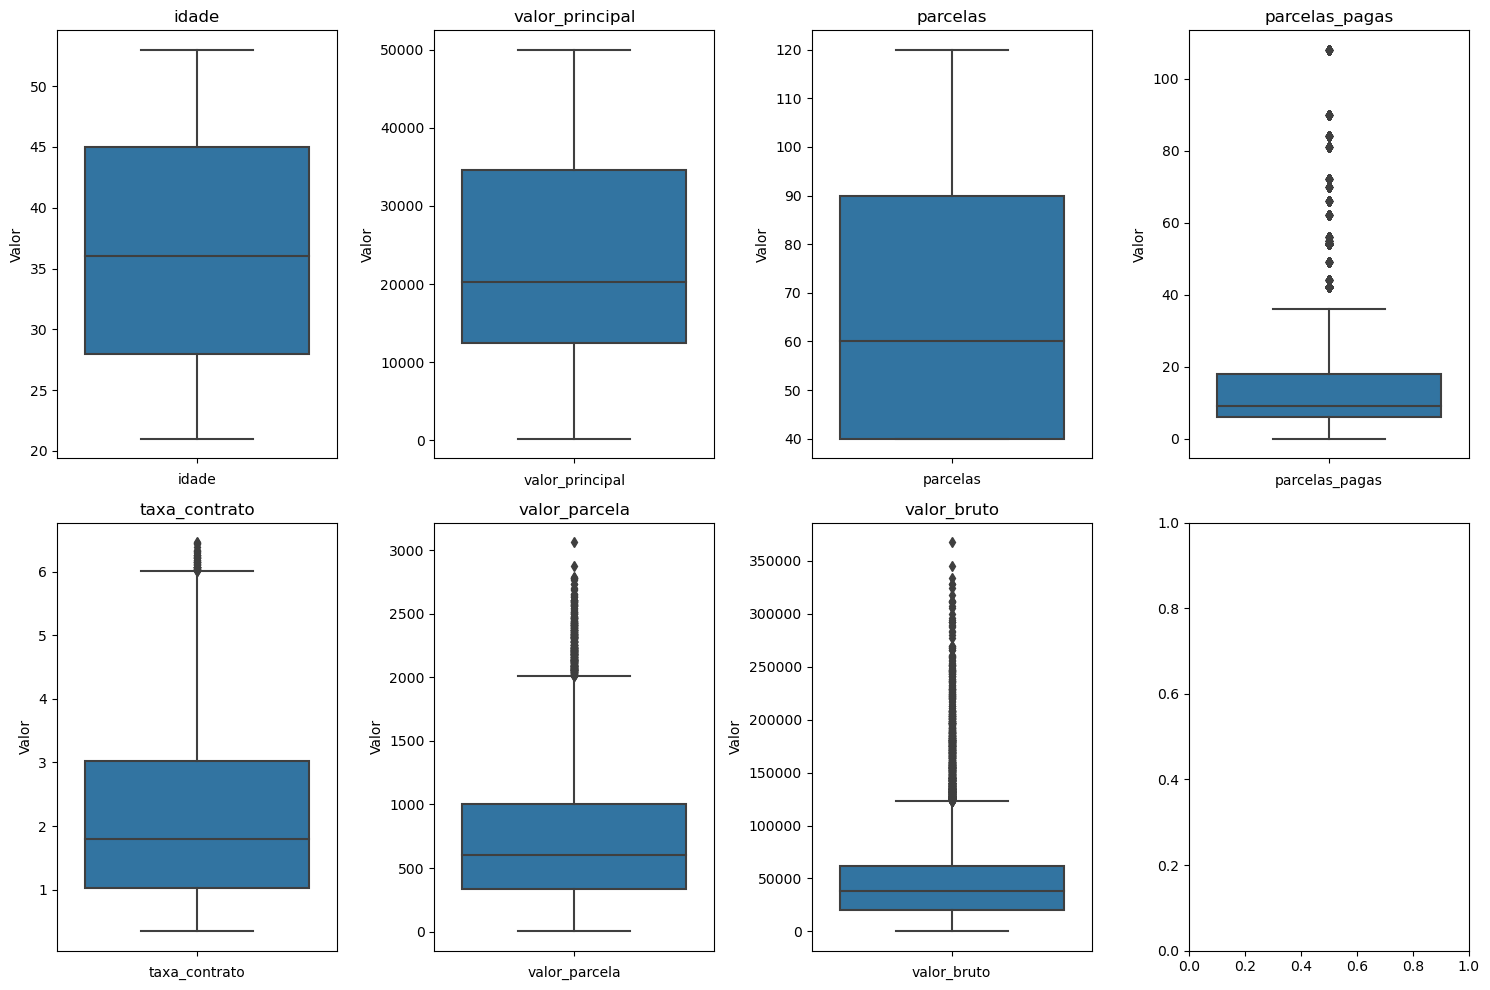

In [19]:
# Selecionando apenas as colunas numéricas
df_arrumado_numeric = df_arrumado.select_dtypes(include=['int64', 'float64'])

# Calculando o número de subplots necessário com base no número de colunas numéricas
num_subplots = len(df_arrumado_numeric.columns)

# Configurando o layout dos subplots
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

# Iterar sobre as colunas numéricas e plotar boxplots
for i, (coluna, ax) in enumerate(zip(df_arrumado_numeric.columns, axs.flatten())):
    sns.boxplot(y=df[coluna], ax=ax)
    ax.set_title(coluna)
    ax.set_xlabel(coluna)
    ax.set_ylabel('Valor')

# Ajustar o layout dos subplots
plt.tight_layout()
plt.show()

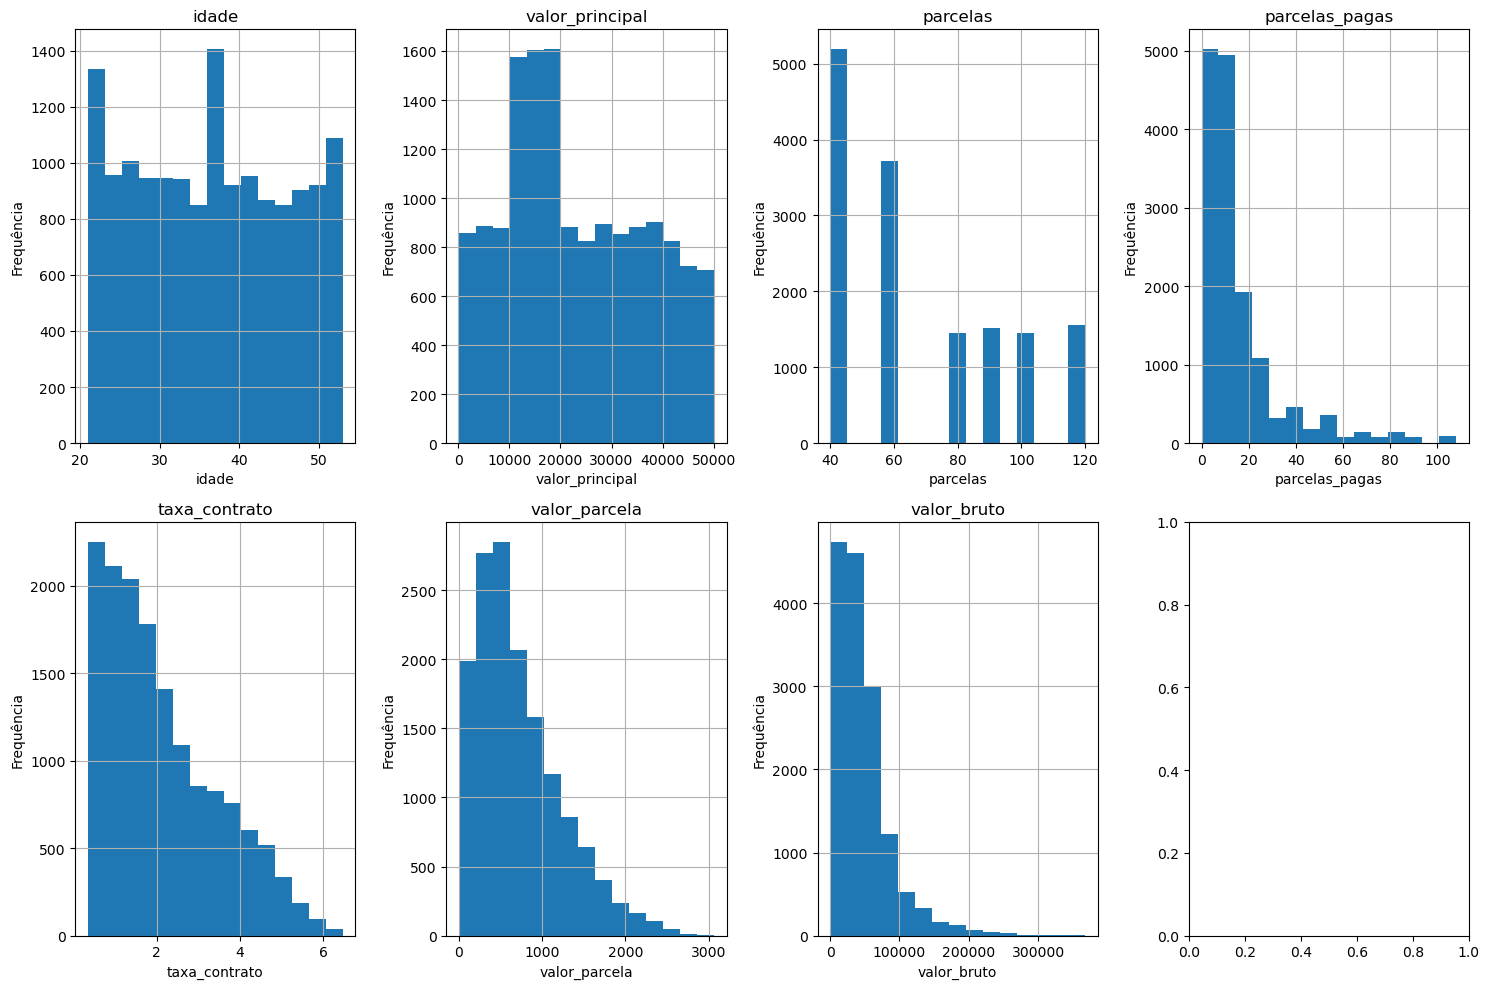

In [20]:

# Configurando o layout dos histogramas
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

# Iterar sobre as colunas numéricas e plotar histogramas
for i, (coluna, ax) in enumerate(zip(df_arrumado_numeric.columns, axs.flatten())):
    df[coluna].hist(ax=ax, bins = 15)
    ax.set_title(coluna)
    ax.set_xlabel(coluna)
    ax.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [21]:
df_arrumado_numeric.describe()

,idade,valor_principal,parcelas,parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto
count,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000
mean,36.556294,23185.875466,68.224236,15.739040,2.134701,724.267448,47446.568597
std,9.323385,13500.843754,27.128264,17.519803,1.341172,515.074503,39877.201593
min,21.000000,203.550000,40.000000,0.000000,0.347370,3.050000,252.400000
25%,28.000000,12484.045000,40.000000,6.000000,1.023490,336.700000,20689.500000
50%,36.000000,20256.790000,60.000000,9.000000,1.793700,601.640000,38220.000000
75%,45.000000,34651.280000,90.000000,18.000000,3.019275,1007.655000,61545.198000
max,53.000000,49995.020000,120.000000,108.000000,6.461680,3063.990000,367678.800000


### Analisando os Boxplots e histogramas das variáveis numéricas podemos notar que:

Vamos fazer um breve resumo sobre cada uma das variáveis numéricas:

* **idade**
    * Varia entre 21 e 53 anos com média e mediana próximas de 36 anos;
    * Apresenta uma distribuição quase que uniforme; 
* **valor_principal**  
    * Entendo como o valor que o cliente solicitou de empréstimo na operação;
    * Variou entre R$203,55 e R$49.995,02 com mediana em R$20.256,79 e média próxima de R$23.000;
    * Aqui notamos uma frequência de valores muito bem distribuída entre o intervalo (R$200 e R$50.000, aproximadamente), exceto na faixa entre R$10.000 e R$20.000, onde há uma frequência maior de operações;
* **parcelas** 
    * Podemos notar que existem 6 opções de quantidades de parcelas (40,60,80,90,100 e 120), com média próxima de 68 parcelas;
    * Notamos que as opções mais escolhidas são 40 e 60 parcelas;
* **parcelas_pagas**
    * varia entre 0 e 108, com mediana em 9 parcelas e média próxima de 16;
    * Aqui podemos notar alguns outliers (valores acima de 40), isso deve ocorrer pois a base original tem menos de 4 anos e, portanto, a maioria dos empréstimos ainda estão sendo pagos. Apesar disso ainda há operações onde o mutuário pagou mais parcelas do que o total de meses desde o início do empréstimo até a data da consulta (22/03/2023). Esses mutuários provavelmente "adiantaram" o pagamento das parcelas;
* **taxa_contrato**
    * Eentendo como a taxa de juros mensal sobre o empréstimo;
    * Possui mínima de 0,347% e máxima de 6,46%, com mediana em 1,79% e média próxima de 2,13%. Aqui podemos notar que, segundo o boxplot, taxas superiores a 6% (aproximadamente) são consideradas outliers;
    * A frequência das taxas é maior para valores menores e a frequência diminui (quase que linearmente) quanto maior a taxa cobrada pela operação;
* **valor_parcela**
    * Apresenta mínima de R$3,05 e máxima de R$3.063,99 com mediana em R$601,64 e média próxima de R$724,27;
    * Aqui podemos notar que, segundo o boxplot, parcelas superiores a R$2.000,00 (aproximadamente) são consideradas outliers;
    * É possível notar, segundo o boxplot, há presença de muitos ouliers nessa variável, em comparação com as outras vaiáveis numéricas;
    * Aqui a distribuição dos dados tem um comportamento muito semelhante a uma curva exponencial decrescente; 
* **valor_bruto**
    * Entendo como o valor que o mutuário deve pagar, somando o valor de todas as parcela;
    * Possui mínima de R$252,4, máxima de R$367.678,00, mediana de R$38.220,00 e média próxima de R$47.447,00;
    * Aqui, segundo os boxplots, são considerados outliers valores superiores a R$125.000,00 (aproximadamente);
    * Aqui a distribuição dos dados tem um comportamento muito semelhante a uma curva exponencial decrescente, como a da variável "valor_parcela".

Agora vamos plotar alguns boxplots de variáveis categóricas agrupando-os em categorias, primeiro por gênero e depois por tipo de operação, para analisarmos se existe alguma tendência e/ ou diferennciação com relação aos diferentes grupos 

Text(0.5, 1.0, 'valor_bruto por Gênero')

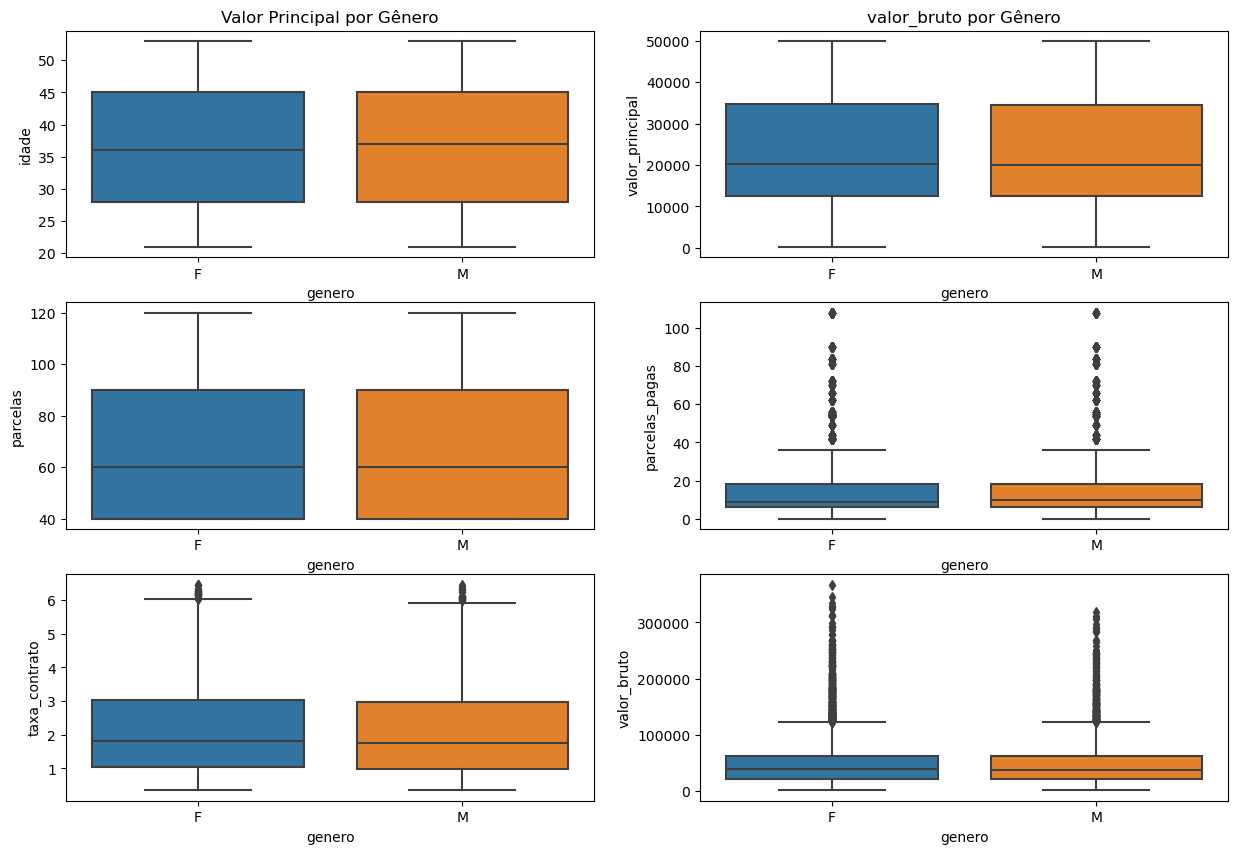

In [22]:
# Configurando o layout dos subplots
fig, axs = plt.subplots(3,2, figsize=(15, 10))

# Boxplots das variáveis numéricas agrupadas por 'genero'
sns.boxplot(x='genero', y='idade', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Valor Principal por Gênero')

sns.boxplot(x='genero', y='valor_principal', data=df, ax=axs[0, 1])
axs[0, 1].set_title('valor_principal por Gênero')

sns.boxplot(x='genero', y='parcelas', data=df, ax=axs[1, 0])
axs[0, 1].set_title('Parcelas por Gênero')

sns.boxplot(x='genero', y='parcelas_pagas', data=df, ax=axs[1, 1])
axs[0, 1].set_title('Parcelas pagas por Gênero')

sns.boxplot(x='genero', y='taxa_contrato', data=df, ax=axs[2, 0])
axs[0, 1].set_title('taxa_contrato por Gênero')

sns.boxplot(x='genero', y='valor_bruto', data=df, ax=axs[2, 1])
axs[0, 1].set_title('valor_bruto por Gênero')

Observamos que não existe uma diferença considerável na distribuição das variáveis numéricas ao comparar gênero Feminimo e Masculino. Vamos aplicar o mesmo para a categoria de operação:

Text(0.5, 1.0, 'valor_bruto por operação')

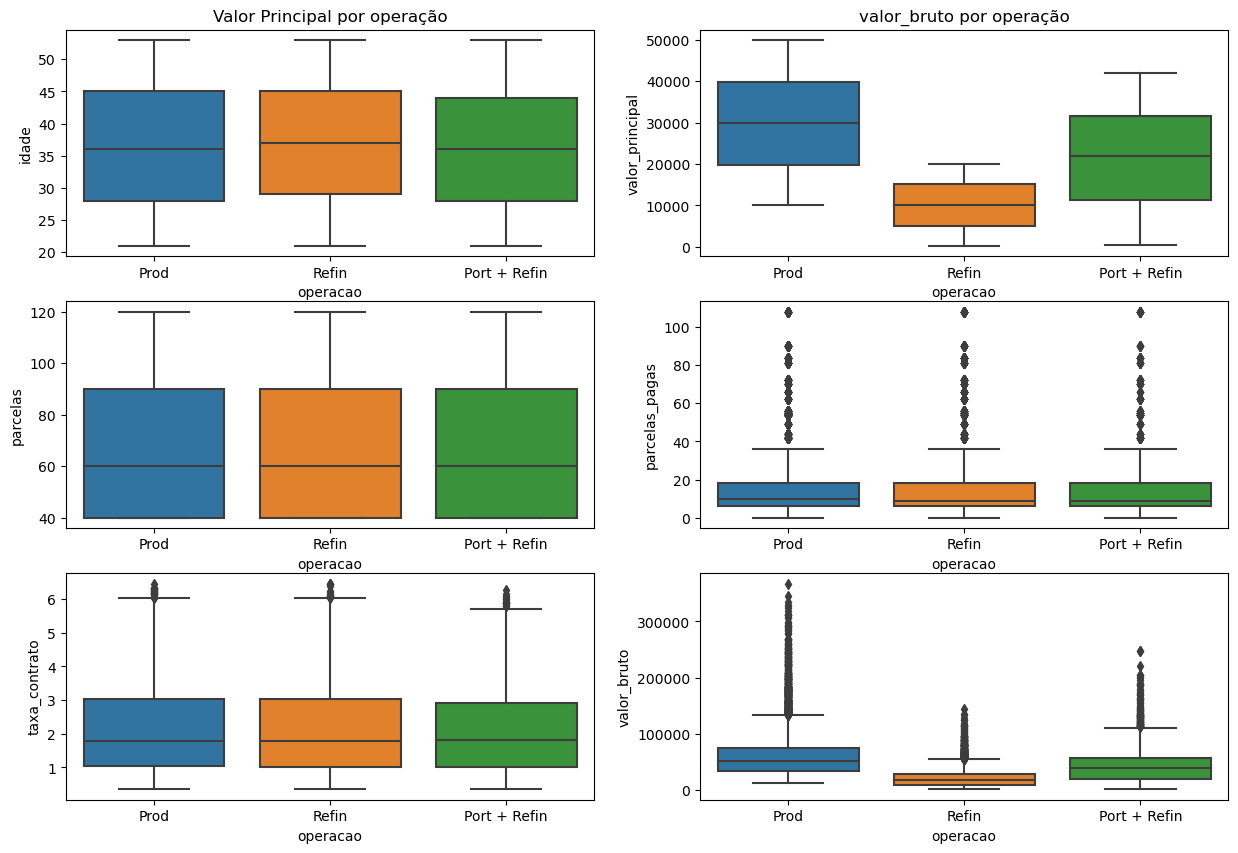

In [23]:
# Configurando o layout dos subplots
fig, axs = plt.subplots(3,2, figsize=(15, 10))

# Plotando boxplots das variáveis numéricas agrupadas por 'operação'
sns.boxplot(x='operacao', y='idade', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Valor Principal por operação')

sns.boxplot(x='operacao', y='valor_principal', data=df, ax=axs[0, 1])
axs[0, 1].set_title('valor_principal por operação')

sns.boxplot(x='operacao', y='parcelas', data=df, ax=axs[1, 0])
axs[0, 1].set_title('Parcelas por operação')

sns.boxplot(x='operacao', y='parcelas_pagas', data=df, ax=axs[1, 1])
axs[0, 1].set_title('parcelas_pagas por operação')

sns.boxplot(x='operacao', y='taxa_contrato', data=df, ax=axs[2, 0])
axs[0, 1].set_title('taxa_contrato por operação')

sns.boxplot(x='operacao', y='valor_bruto', data=df, ax=axs[2, 1])
axs[0, 1].set_title('valor_bruto por operação')

In [24]:
# Agrupando as principais estatísticas descritivas de "valor_principal" e "valor_bruto" baseados por tipo de operação 
descritivas_por_operacao = df.groupby('operacao')[['valor_principal', 'valor_bruto']].describe()

print(descritivas_por_operacao)


             valor_principal                                                   \
                       count          mean           std       min        25%   
operacao                                                                        
Port + Refin          1539.0  21575.957420  11931.657926    370.79  11262.655   
Prod                  8925.0  29958.593519  11494.339773  10003.84  19866.730   
Refin                 4431.0  10103.310636   5721.520832    203.55   5123.370   

                                            valor_bruto                \
                   50%        75%       max       count          mean   
operacao                                                                
Port + Refin  21903.57  31677.395  41933.51      1539.0  44113.145100   
Prod          29982.75  39842.420  49995.02      8925.0  61214.166710   
Refin         10060.72  15110.490  19995.28      4431.0  20873.408049   

                                                                       \
 

Aqui podemos notar que para as variáveis "idade", "parcelas", "parcelas_pagas" e "taxa_contrato", as distribuições são muitos semelhantes para os 3 tipos distintos de operações. Entretanto, as variáveis "valor_principal" e "valor_bruto" apresentam uma diferença significativa, com mínima, média, mediana e máximo da categoria "prod" consideravelmente superior, e as mesmas estatísticas consideravelmente inferiores para a categoria "Refin". 

### Vamos agora medir as correlações entre as variáveis categóricas, para tentar entender se existe alguma relação considerável entre as variáveis

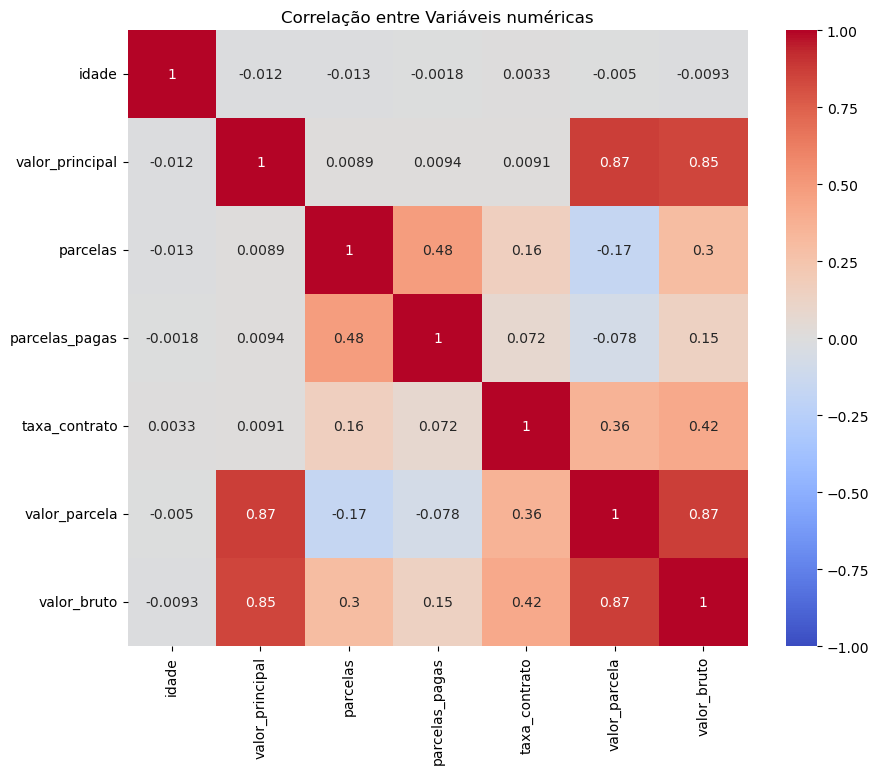

In [25]:
# Calcular a matriz de correlação usando o coeficiente de correlação de Spearman
correlacao = df_arrumado_numeric.corr(method='spearman')

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Variáveis numéricas')
plt.show()

Podemos notar que existem correlações fortes entre as variáveis de valores ("valor_principal", "valor_parcela" e "valor_bruto") e isso já é esperado, pois o valor bruto que deve ser pago pelo mutuário depende diretamente do valor emprestado ("valor_principa") e o "valor_parcela", por sua vez, depende diretamente da divisão do valor bruto pelo total de parcelas que devem ser pagas. 

---

## **PARTE 3**: Faça uma projeção do crescimento da carteira para os próximos 2 anos em termos de volume de operações e da carteira utilizando os métodos de ciência de dados que julgar mais adequados para essa tarefa

## 3.0 - Arrumando os dados para calcular a projeção

Primeiramente vamos criar um novo dataframe com algumas informações importantes para realizar a projeção:
* **Período**: aqui vou agrupar por cada mês ao longo dos 4 anos de operações para depois realizar a projeção para os próximos 24 meses (2 anos)
* **Total_operacoes**: Volume de operações realizadas para cada mês
* **Soma_valor_principal**: Volume fiananceiro oferecido nas operações da carteira
* **Soma_valor_bruto**: Potencial volume fiananceiro a receber da carteira (digo potencial devido a possibilidade de inadimplência)

In [26]:
# Extraindo o mês da data de operação e criando uma nova coluna 'mes_operacao'
df_arrumado['mes_operacao'] = df_arrumado['data_operacao'].dt.to_period('M').dt.to_timestamp()

# Agrupando os dados por mês de operação e calculando a contagem, a média de 'taxa_contrato', a soma de 'valor_principal' e a soma de 'valor_bruto'
df_projecao = df_arrumado.groupby('mes_operacao').agg({
    'data_operacao': 'count', 
    'taxa_contrato': 'mean',  
    'valor_principal': 'sum', 
    'valor_bruto': 'sum'        
}).reset_index()

# Renomeando as colunas
df_projecao.columns = ['Período', 'Total_operacoes','Média_Taxa_contrato','Soma_valor_principal', 'Soma_valor_bruto']

print(df_projecao)


      Período  Total_operacoes  Média_Taxa_contrato  Soma_valor_principal  \
0  2019-01-01              254             1.984714            5836138.92   
1  2019-02-01              217             1.964223            4774070.98   
2  2019-03-01              250             1.992377            5723856.49   
3  2019-04-01              258             2.011824            6309266.73   
4  2019-05-01              248             2.002024            5881174.41   
5  2019-06-01              258             1.987972            6000262.41   
6  2019-07-01              267             2.009663            6093957.19   
7  2019-08-01              258             1.871771            6079568.05   
8  2019-09-01              234             1.801450            5394822.77   
9  2019-10-01              257             1.668985            5896509.42   
10 2019-11-01              246             1.539393            5550650.52   
11 2019-12-01              238             1.442117            5599697.29   

Olhando por cima o Dataframe criado, observamos que há uma tendência de crescimento ao longo do tempo do volume de operações, volume do valor principal e volume do valor bruto

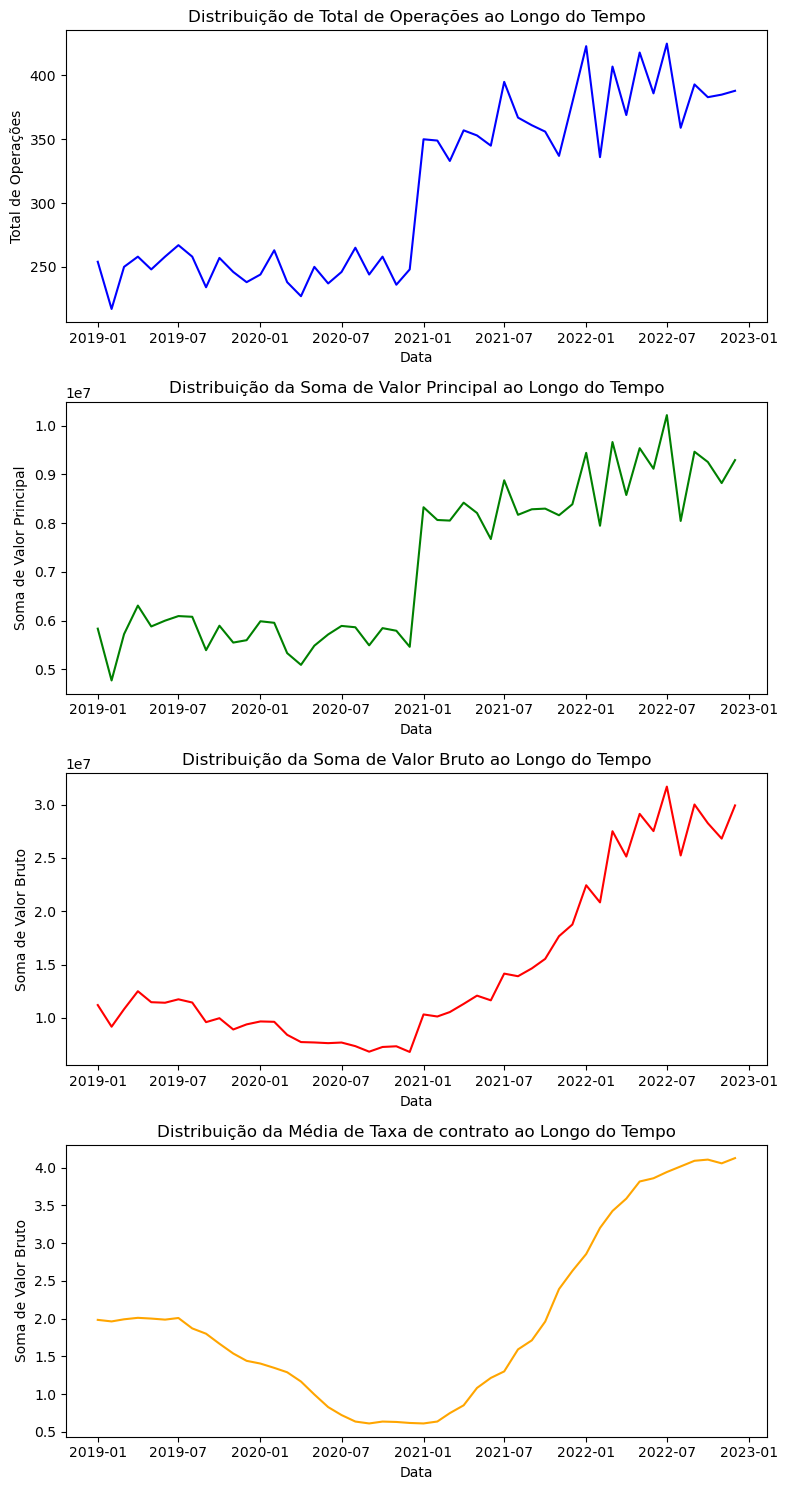

In [27]:
fig, axs = plt.subplots(4, 1, figsize=(8, 15))

# Gráfico de linha para a distribuição de total de operações ao longo do tempo
axs[0].plot(df_projecao['Período'], df_projecao['Total_operacoes'], color='blue')
axs[0].set_title('Distribuição de Total de Operações ao Longo do Tempo')
axs[0].set_xlabel('Data')
axs[0].set_ylabel('Total de Operações')

# Gráfico de linha para a distribuição da soma de valor principal ao longo do tempo
axs[1].plot(df_projecao['Período'], df_projecao['Soma_valor_principal'], color='green')
axs[1].set_title('Distribuição da Soma de Valor Principal ao Longo do Tempo')
axs[1].set_xlabel('Data')
axs[1].set_ylabel('Soma de Valor Principal')

# Gráfico de linha para a distribuição da soma de valor bruto ao longo do tempo
axs[2].plot(df_projecao['Período'], df_projecao['Soma_valor_bruto'], color='red')
axs[2].set_title('Distribuição da Soma de Valor Bruto ao Longo do Tempo')
axs[2].set_xlabel('Data')
axs[2].set_ylabel('Soma de Valor Bruto')

# Gráfico de linha para a distribuição da soma de valor bruto ao longo do tempo
axs[3].plot(df_projecao['Período'], df_projecao['Média_Taxa_contrato'], color='orange')
axs[3].set_title('Distribuição da Média de Taxa de contrato ao Longo do Tempo')
axs[3].set_xlabel('Data')
axs[3].set_ylabel('Soma de Valor Bruto')

# Ajustar o layout dos subplots
plt.tight_layout()

# Mostrar os gráficos
plt.show()


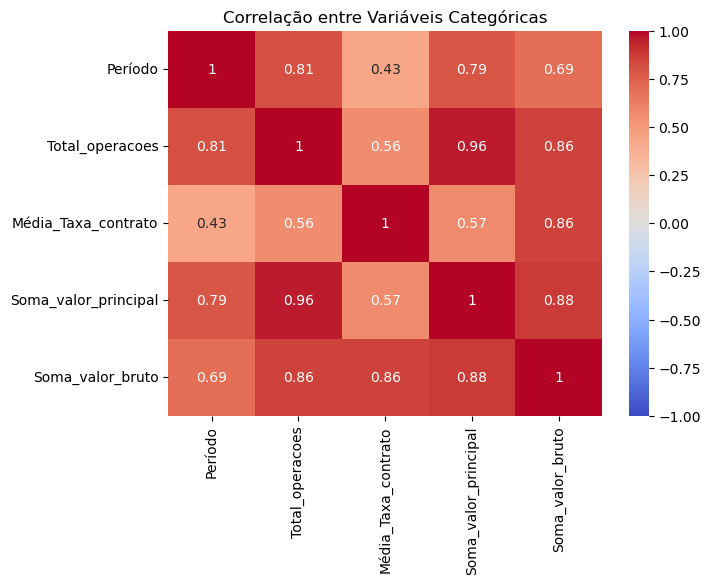

In [28]:
# Criando um gráfico de correlação entre as variáveis
correlacao_volume = df_projecao.corr(method='spearman')

plt.figure(figsize=(7, 5))
sns.heatmap(correlacao_volume, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Variáveis Categóricas')
plt.show()

* Aqui podemos notar uma semelhança entre os dois primeiros gráficos. Também plotamos a correlação entre os volumes e vimos que há uma correlação forte entre todas as colunas, principalmente entre "Total_operacoes" e "Soma_valor_principal";
* Notamos também que entre 2019 e 2020 o volume de operações e o volume do "valor principal" andaram de lado, sem crescimento nem redução significativos. Entretanto, a partir de janeiro de 2021 houve um grande crescimento nesses volumes e nos 2 anos seguintes (entre 2021 e 2022) esse volume continuou crescendo;
* Para o volume de "valor bruto", notamos que entre 2019 e 2020 o volume vinha em decadência até a virada de ano (de 2020 para 2021), quando houve um crescimento significato, que seguiu para o período dos 2 anos seguintes (Isso deve ter ocorrido devido a taxa);
* Notamos também um correlação forte entre "Média_Taxa_contrato" e volume de "valor_bruto". Isso ocorre pois o quando o valor que o mutuário deve pagar ao longo do tempo é diretamente impactado pela taxa cobrada pelo credor;

## 3.1 - Cálculo da projeção de Volume de operações para os próximos 2 anos

Para as previsões, utilizarei a função "auto_arima", que cria um modelo de séries temporais ARIMA, selecionando os melhores parâmetros para o modelo baseado na distribuição do dados, evitando a necessidade da escolha de parâmetros manual

In [29]:
from pmdarima import auto_arima

# Encontrando os melhores parâmetros para o modelo SARIMA
modelo = auto_arima(df_projecao["Total_operacoes"], seasonal=True, m=12)

# Fazendo a previsão para os próximos 24 valores com intervalo de confiança (95% de confiança)
previsao_operacoes, intervalo_confianca_operacoes = modelo.predict(n_periods=24,alpha =0.05, return_conf_int=True)

print("Previsão para os próximos 24 valores:")
print(previsao_operacoes)
print("Intervalo de confiança:")
print(intervalo_confianca_operacoes)



Previsão para os próximos 24 valores:
48    394.210782
49    397.417168
50    400.623554
51    403.829941
52    407.036327
53    410.242713
54    413.449099
55    416.655486
56    419.861872
57    423.068258
58    426.274645
59    429.481031
60    432.687417
61    435.893803
62    439.100190
63    442.306576
64    445.512962
65    448.719349
66    451.925735
67    455.132121
68    458.338507
69    461.544894
70    464.751280
71    467.957666
dtype: float64
Intervalo de confiança:
[[340.34238302 448.07918055]
 [338.83044657 456.00388956]
 [337.67116372 463.57594498]
 [336.79559841 470.86428284]
 [336.15471726 477.91793656]
 [335.7121682  484.77325818]
 [335.44011482 491.45808412]
 [335.31668052 497.99429098]
 [335.32430177 504.3994423 ]
 [335.44862389 510.68789274]
 [335.67773578 516.87155341]
 [336.00162439 522.96043736]
 [336.41177649 528.96305783]
 [336.90088179 534.88672509]
 [337.46260766 540.73777178]
 [338.09142529 546.52172671]
 [338.78247373 552.24345084]
 [339.53145209 557.907

Agora vamos calcular os intervalos de confiança das projeções (95% de confiança) e adicionar os valores previstos a um novo dataframe "df_operacoes" com os valores passados e as projeções

In [30]:
import pandas as pd

# Criando um DataFrame vazio para armazenar as observações
df_operacoes = pd.DataFrame()

# Adicionando as 48 observações iniciais ao DataFrame final
df_operacoes['Período'] = df_projecao['Período'].iloc[:48]
df_operacoes['Total_operacoes'] = df_projecao['Total_operacoes'].iloc[:48]

# Criando um DataFrame para as próximas 24 projeções
proximas_projecoes = pd.DataFrame({
    'Período': pd.date_range(start='2023-01-01', periods=24, freq='M').strftime('%Y-%m')+'-01',
    'Total_operacoes': previsao_operacoes,
    'Limite Inferior': intervalo_confianca_operacoes[:, 0],
    'Limite Superior': intervalo_confianca_operacoes[:, 1]
})

# Corrigindo o formato das datas das 48 observações iniciais
df_operacoes['Período'] = pd.to_datetime(df_operacoes['Período']).dt.strftime('%Y-%m-%d')

# Corrigindo o formato das datas das próximas 24 projeções
proximas_projecoes['Período'] = pd.to_datetime(proximas_projecoes['Período']).dt.strftime('%Y-%m-%d')


# Concatenadno o DataFrame de observações iniciais com o DataFrame das próximas projeções
df_operacoes = pd.concat([df_operacoes, proximas_projecoes], ignore_index=True)

In [31]:
# Mostrando o novo DataFrame final com as 72 observações
df_operacoes.tail(30)

,Período,Total_operacoes,Limite Inferior,Limite Superior
42,2022-07-01,425.000000,NaN,NaN
43,2022-08-01,359.000000,NaN,NaN
44,2022-09-01,393.000000,NaN,NaN
45,2022-10-01,383.000000,NaN,NaN
46,2022-11-01,385.000000,NaN,NaN
47,2022-12-01,388.000000,NaN,NaN
48,2023-01-01,394.210782,340.342383,448.079181
49,2023-02-01,397.417168,338.830447,456.003890
50,2023-03-01,400.623554,337.671164,463.575945
51,2023-04-01,403.829941,336.795598,470.864283


Agora criaremos um gráfico com as previsões com os intervalos de confiança e juntar com os dados passados de volume de operações:

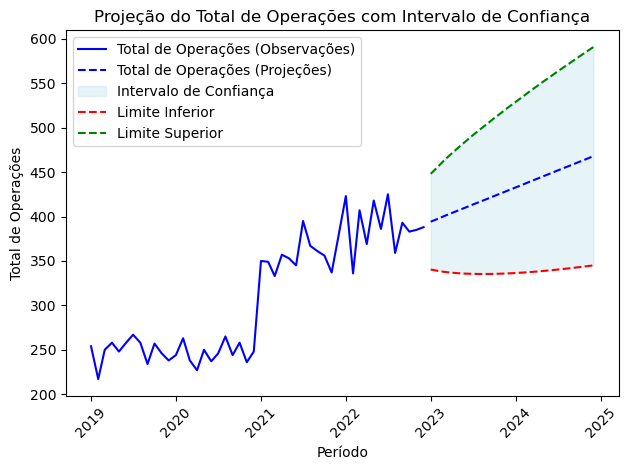

In [32]:
import matplotlib.pyplot as plt

# Convertendo as datas para o formato datetime
df_operacoes['Período'] = pd.to_datetime(df_operacoes['Período'])

# Separarndo as observações das projeções
observacoes_operacoes = df_operacoes.iloc[:-24]
projecoes_operacoes = df_operacoes.iloc[-24:]

# Plotando as observações
plt.plot(observacoes_operacoes['Período'], observacoes_operacoes['Total_operacoes'], color='blue', label='Total de Operações (Observações)')

# Plotando as projeções
plt.plot(projecoes_operacoes['Período'], projecoes_operacoes['Total_operacoes'], linestyle='--', color='blue', label='Total de Operações (Projeções)')

# Preenchendo a área entre os limites inferior e superior
plt.fill_between(df_operacoes['Período'], df_operacoes['Limite Inferior'], df_operacoes['Limite Superior'], color='lightblue', alpha=0.3, label='Intervalo de Confiança')

# Plotando os limites inferior e superior
plt.plot(df_operacoes['Período'], df_operacoes['Limite Inferior'], color='red', linestyle='--', label='Limite Inferior')
plt.plot(df_operacoes['Período'], df_operacoes['Limite Superior'], color='green', linestyle='--', label='Limite Superior')

# Adicionando legenda e rótulos dos eixos
plt.legend()
plt.xlabel('Período')
plt.ylabel('Total de Operações')
plt.title('Projeção do Total de Operações com Intervalo de Confiança')

# Girando os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Agora vamos fazer uma somatória das previsões e seus intervalos de confianças para os próximos 2 anos

In [33]:
# Adicionando uma nova coluna 'Ano' ao DataFrame
df_operacoes['Ano'] = df_operacoes['Período'].dt.year

# Separando as projeções por ano
projecoes_por_ano = df_operacoes[df_operacoes['Período'] > '2022-12-31']

# Agrupando as projeções por ano e calcular as somas
soma_projecoes_por_ano = projecoes_por_ano.groupby('Ano')['Total_operacoes'].sum()
soma_limite_inferior_por_ano = projecoes_por_ano.groupby('Ano')['Limite Inferior'].sum()
soma_limite_superior_por_ano = projecoes_por_ano.groupby('Ano')['Limite Superior'].sum()

# Separando as projeções por ano (primeiro e segundo ano)
projecoes_primeiro_ano = projecoes_por_ano[projecoes_por_ano['Ano'] == 2023]
projecoes_segundo_ano = projecoes_por_ano[projecoes_por_ano['Ano'] == 2024]

# Calculando as somas do primeiro e segundo ano separadamente
soma_projecoes_primeiro_ano = projecoes_primeiro_ano['Total_operacoes'].sum()
soma_projecoes_segundo_ano = projecoes_segundo_ano['Total_operacoes'].sum()
soma_limite_inferior_primeiro_ano = projecoes_primeiro_ano['Limite Inferior'].sum()
soma_limite_inferior_segundo_ano = projecoes_segundo_ano['Limite Inferior'].sum()
soma_limite_superior_primeiro_ano = projecoes_primeiro_ano['Limite Superior'].sum()
soma_limite_superior_segundo_ano = projecoes_segundo_ano['Limite Superior'].sum()

# CAlculando a soma total dos dois anos
soma_projecoes_total = soma_projecoes_por_ano.sum()
soma_limite_inferior_total = soma_limite_inferior_por_ano.sum()
soma_limite_superior_total = soma_limite_superior_por_ano.sum()

# Mostrando os resultados
print("\nSoma das Projeções do Primeiro Ano:", soma_projecoes_primeiro_ano)
print("Soma das Projeções do Segundo Ano:", soma_projecoes_segundo_ano)
print("\nSoma dos Limites Inferiores do Primeiro Ano:", soma_limite_inferior_primeiro_ano)
print("Soma dos Limites Inferiores do Segundo Ano:", soma_limite_inferior_segundo_ano)
print("\nSoma dos Limites Superiores do Primeiro Ano:", soma_limite_superior_primeiro_ano)
print("Soma dos Limites Superiores do Segundo Ano:", soma_limite_superior_segundo_ano)
print("\nSoma Total das Projeções:", soma_projecoes_total)
print("Soma Total dos Limites Inferiores:", soma_limite_inferior_total)
print("Soma Total dos Limites Superiores:", soma_limite_superior_total)



Soma das Projeções do Primeiro Ano: 4942.150875960433
Soma das Projeções do Segundo Ano: 5403.870500447179

Soma dos Limites Inferiores do Primeiro Ano: 4038.7155583453327
Soma dos Limites Inferiores do Segundo Ano: 4082.906131133164

Soma dos Limites Superiores do Primeiro Ano: 5845.586193575536
Soma dos Limites Superiores do Segundo Ano: 6724.834869761197

Soma Total das Projeções: 10346.021376407614
Soma Total dos Limites Inferiores: 8121.621689478497
Soma Total dos Limites Superiores: 12570.421063336731


Agora vamos calcular a soma de operaçoes para os 4 primeiros anos e calcular a taxa de crescimento para os próximos 2 anos baseado nas projeções do modelo criado

In [34]:
# Calculando a soma total de operações por ano
soma_operacoes_por_ano = df_operacoes.groupby('Ano')['Total_operacoes'].sum()

# Calculando a taxa de crescimento percentual de um ano para o outro
taxa_crescimento = soma_operacoes_por_ano.pct_change().fillna(0) * 100

# Criando o DataFrame resultado_operacoes
resultado_operacoes = pd.DataFrame({
    'Ano': soma_operacoes_por_ano.index,
    'Total_operacoes': soma_operacoes_por_ano.values,
    'Taxa_de_Crescimento': taxa_crescimento.values
})

print(resultado_operacoes)


    Ano  Total_operacoes  Taxa_de_Crescimento
0  2019      2985.000000             0.000000
1  2020      2956.000000            -0.971524
2  2021      4282.000000            44.857916
3  2022      4672.000000             9.107894
4  2023      4942.150876             5.782339
5  2024      5403.870500             9.342483


### Finalmente temos que, segundo o modelo criado, a carteira tem uma projeção de crescimento de aproximadamente **5,8%** de 2022 para 2023 e **9,3%** de 2023 para 2024, com um total estimado de **4942** operações no ano de 2023 e **5403** no ano de 2024

---

## 3.2 - Cálculo da projeção de Volume de "valor_principal" para os próximos 2 anos

In [35]:
# Encontrando os melhores parâmetros para o modelo SARIMA
modelo2 = auto_arima(df_projecao["Soma_valor_principal"], seasonal=True, m=12, method='lbfgs')

# Fazendo a previsão para os próximos 24 valores com intervalo de confiança
previsao_principal, intervalo_confianca_principal = modelo2.predict(n_periods=24,alpha =0.05, return_conf_int=True)

print("Previsão para os próximos 24 valores:")
print(previsao_principal)
print("Intervalo de confiança:")
print(intervalo_confianca_principal)


Previsão para os próximos 24 valores:
48    1.020396e+07
49    1.009275e+07
50    1.016816e+07
51    1.024594e+07
52    1.022501e+07
53    1.000120e+07
54    1.051876e+07
55    1.011603e+07
56    1.024983e+07
57    1.024119e+07
58    1.016276e+07
59    1.027683e+07
60    1.072716e+07
61    1.016547e+07
62    1.080715e+07
63    1.040909e+07
64    1.076407e+07
65    1.059321e+07
66    1.103481e+07
67    1.020338e+07
68    1.073875e+07
69    1.065996e+07
70    1.049456e+07
71    1.067672e+07
dtype: float64
Intervalo de confiança:
[[ 8875888.37285369 11532036.39408887]
 [ 8528370.75050355 11657132.72337143]
 [ 8302811.71318129 12033507.43845813]
 [ 8155080.55216479 12336803.61653885]
 [ 7919464.9075539  12530560.64524008]
 [ 7503253.43002486 12499141.55300341]
 [ 7840830.38285626 13196687.34605852]
 [ 7269964.45285011 12962092.14892391]
 [ 7244849.91658663 13254812.8419573 ]
 [ 7085347.96303536 13397035.27369564]
 [ 6862925.38095657 13462602.70950343]
 [ 6839027.07485264 13714625.79797396]

In [36]:
# Criando um DataFrame vazio para armazenar as observações
df_principal = pd.DataFrame()

# AdicionarAdicionando as 48 observações iniciais ao DataFrame final
df_principal['Período'] = df_projecao['Período'].iloc[:48]
df_principal['Soma_valor_principal'] = df_projecao['Soma_valor_principal'].iloc[:48]

# Criando um DataFrame para as próximas 24 projeções
proximas_principal = pd.DataFrame({
    'Período': pd.date_range(start='2023-01-01', periods=24, freq='M').strftime('%Y-%m')+'-01',
    'Soma_valor_principal': previsao_principal,
    'Limite Inferior': intervalo_confianca_principal[:, 0],
    'Limite Superior': intervalo_confianca_principal[:, 1]
})

# Corrigindo o formato das datas das 48 observações iniciais
df_principal['Período'] = pd.to_datetime(df_principal['Período']).dt.strftime('%Y-%m-%d')

# Corrigindo o formato das datas das próximas 24 projeções
proximas_principal['Período'] = pd.to_datetime(proximas_principal['Período']).dt.strftime('%Y-%m-%d')


# Concatenando o DataFrame de observações iniciais com o DataFrame das próximas projeções
df_principal = pd.concat([df_principal, proximas_principal], ignore_index=True)

In [37]:
df_principal.tail(30)

,Período,Soma_valor_principal,Limite Inferior,Limite Superior
42,2022-07-01,1.021453e+07,NaN,NaN
43,2022-08-01,8.044784e+06,NaN,NaN
44,2022-09-01,9.463801e+06,NaN,NaN
45,2022-10-01,9.253038e+06,NaN,NaN
46,2022-11-01,8.821105e+06,NaN,NaN
47,2022-12-01,9.291982e+06,NaN,NaN
48,2023-01-01,1.020396e+07,8.875888e+06,1.153204e+07
49,2023-02-01,1.009275e+07,8.528371e+06,1.165713e+07
50,2023-03-01,1.016816e+07,8.302812e+06,1.203351e+07
51,2023-04-01,1.024594e+07,8.155081e+06,1.233680e+07


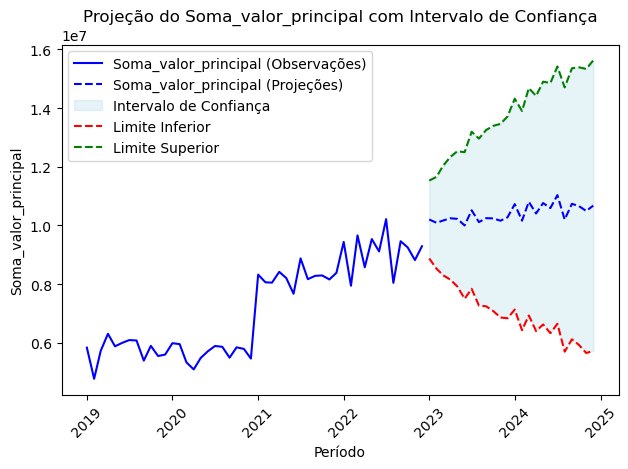

In [38]:
# Convertendo as datas para o formato datetime
df_principal['Período'] = pd.to_datetime(df_principal['Período'])

# Seprando as observações das projeções
observacoes_principal = df_principal.iloc[:-24]
projecoes_principal = df_principal.iloc[-24:]

# Plotando as observações
plt.plot(observacoes_principal['Período'], observacoes_principal['Soma_valor_principal'], color='blue', label='Soma_valor_principal (Observações)')

# Plotando as projeções
plt.plot(projecoes_principal['Período'], projecoes_principal['Soma_valor_principal'], linestyle='--', color='blue', label='Soma_valor_principal (Projeções)')

# Preenchendo a área entre os limites inferior e superior
plt.fill_between(df_principal['Período'], df_principal['Limite Inferior'], df_principal['Limite Superior'], color='lightblue', alpha=0.3, label='Intervalo de Confiança')

# Plotando os limites inferior e superior
plt.plot(df_principal['Período'], df_principal['Limite Inferior'], color='red', linestyle='--', label='Limite Inferior')
plt.plot(df_principal['Período'], df_principal['Limite Superior'], color='green', linestyle='--', label='Limite Superior')

# Adicionadno legenda e rótulos dos eixos
plt.legend()
plt.xlabel('Período')
plt.ylabel('Soma_valor_principal')
plt.title('Projeção do Soma_valor_principal com Intervalo de Confiança')

# Girando os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [39]:
# Adicionando uma nova coluna 'Ano' ao DataFrame
df_principal['Ano'] = df_principal['Período'].dt.year

# Separando as projeções por ano
principal_por_ano = df_principal[df_principal['Período'] > '2022-12-31']

# Agrupando as projeções por ano e calcular as somas
soma_principal_por_ano = principal_por_ano.groupby('Ano')['Soma_valor_principal'].sum()
soma_limite_inferior_por_ano_principal = principal_por_ano.groupby('Ano')['Limite Inferior'].sum()
soma_limite_superior_por_ano_principal = principal_por_ano.groupby('Ano')['Limite Superior'].sum()

# Separando as projeções por ano (primeiro e segundo ano)
principal_primeiro_ano = principal_por_ano[principal_por_ano['Ano'] == 2023]
principal_segundo_ano = principal_por_ano[principal_por_ano['Ano'] == 2024]

# Calculando as somas do primeiro e segundo ano separadamente
soma_principal_primeiro_ano = principal_primeiro_ano['Soma_valor_principal'].sum()
soma_principal_segundo_ano = principal_segundo_ano['Soma_valor_principal'].sum()
soma_limite_inferior_primeiro_ano_principal = principal_primeiro_ano['Limite Inferior'].sum()
soma_limite_inferior_segundo_ano_principal = principal_segundo_ano['Limite Inferior'].sum()
soma_limite_superior_primeiro_ano_principal = principal_primeiro_ano['Limite Superior'].sum()
soma_limite_superior_segundo_ano_principal = principal_segundo_ano['Limite Superior'].sum()

# Calculando a soma total dos dois anos
soma_principal_total = soma_principal_por_ano.sum()
soma_limite_inferior_total_principal = soma_limite_inferior_por_ano_principal.sum()
soma_limite_superior_total_principal = soma_limite_superior_por_ano_principal.sum()

# Mostrando os resultados
print("\nSoma do Valor Principal do Primeiro Ano:", soma_principal_primeiro_ano)
print("Soma do Valor Principal do Segundo Ano:", soma_principal_segundo_ano)
print("\nSoma dos Limites Inferiores do Valor Principal do Primeiro Ano:", soma_limite_inferior_primeiro_ano_principal)
print("Soma dos Limites Inferiores do Valor Principal do Segundo Ano:", soma_limite_inferior_segundo_ano_principal)
print("\nSoma dos Limites Superiores do Valor Principal do Primeiro Ano:", soma_limite_superior_primeiro_ano_principal)
print("Soma dos Limites Superiores do Valor Principal do Segundo Ano:", soma_limite_superior_segundo_ano_principal)
print("\nSoma Total do Valor Principal:", soma_principal_total)
print("Soma Total dos Limites Inferiores do Valor Principal:", soma_limite_inferior_total_principal)
print("Soma Total dos Limites Superiores do Valor Principal:", soma_limite_superior_total_principal)



Soma do Valor Principal do Primeiro Ano: 122502426.69311659
Soma do Valor Principal do Segundo Ano: 127274336.15167868

Soma dos Limites Inferiores do Valor Principal do Primeiro Ano: 92427814.89741963
Soma dos Limites Inferiores do Valor Principal do Segundo Ano: 75627174.40802494

Soma dos Limites Superiores do Valor Principal do Primeiro Ano: 152577038.48881355
Soma dos Limites Superiores do Valor Principal do Segundo Ano: 178921497.89533246

Soma Total do Valor Principal: 249776762.8447953
Soma Total dos Limites Inferiores do Valor Principal: 168054989.3054446
Soma Total dos Limites Superiores do Valor Principal: 331498536.384146


In [49]:
# Calculando a soma total de operações por ano
soma_principal_por_ano = df_principal.groupby('Ano')['Soma_valor_principal'].sum()

# Calculando a taxa de crescimento percentual de um ano para o outro
taxa_crescimento_principal = soma_principal_por_ano.pct_change().fillna(0) * 100

# Criando o DataFrame resultado_principal
resultado_principal = pd.DataFrame({
    'Ano': soma_principal_por_ano.index,
    'Soma_Valor_principal': soma_principal_por_ano.values,
    'Taxa_de_Crescimento': taxa_crescimento_principal.values
})

print(resultado_principal)


    Ano  Soma_Valor_principal  Taxa_de_Crescimento
0  2019          6.913998e+07             0.000000
1  2020          6.793042e+07            -1.749430
2  2021          9.891676e+07            45.614817
3  2022          1.093665e+08            10.564143
4  2023          1.225024e+08            12.010961
5  2024          1.272743e+08             3.895359


### Finalmente temos que, segundo o modelo criado, a carteira tem uma projeção de crescimento do "valor_principal" de aproximadamente **12%** de 2022 para 2023 e **3,9%** de 2023 para 2024, com um total estimado de aproximadamente **R$122.502.400** no ano de 2023 e **R$127.274.300** no ano de 2024

---

## 3.3 - Cálculo da projeção de Volume de "valor_bruto" para os próximos 2 anos

In [41]:
# Encontrando os melhores parâmetros para o modelo SARIMA
modelo3 = auto_arima(df_projecao["Soma_valor_bruto"], seasonal=True, m=12, method='lbfgs')

# Fazendo a previsão para os próximos 24 valores com intervalo de confiança
previsao_bruto, intervalo_confianca_bruto = modelo3.predict(n_periods=24,alpha =0.05, return_conf_int=True)

print("Previsão para os próximos 24 valores:")
print(previsao_bruto)
print("Intervalo de confiança:")
print(intervalo_confianca_bruto)

Previsão para os próximos 24 valores:
48    2.899860e+07
49    2.948120e+07
50    3.152524e+07
51    3.115939e+07
52    3.259916e+07
53    3.240305e+07
54    3.390974e+07
55    3.227733e+07
56    3.396527e+07
57    3.372222e+07
58    3.357118e+07
59    3.476588e+07
60    3.476778e+07
61    3.518579e+07
62    3.606500e+07
63    3.623239e+07
64    3.693312e+07
65    3.715065e+07
66    3.787114e+07
67    3.766442e+07
68    3.843845e+07
69    3.864212e+07
70    3.887296e+07
71    3.950130e+07
dtype: float64
Intervalo de confiança:
[[ 2.57457418e+07  3.22514494e+07]
 [ 2.54973820e+07  3.34650219e+07]
 [ 2.55109332e+07  3.75395502e+07]
 [ 2.28246069e+07  3.94941781e+07]
 [ 2.15093801e+07  4.36889444e+07]
 [ 1.82603233e+07  4.65457774e+07]
 [ 1.64354388e+07  5.13840434e+07]
 [ 1.12242693e+07  5.33303888e+07]
 [ 9.10385508e+06  5.88266923e+07]
 [ 4.83803861e+06  6.26064081e+07]
 [ 4.61666994e+05  6.66806842e+07]
 [-2.76149043e+06  7.22932482e+07]
 [-7.80670827e+06  7.73422756e+07]
 [-1.2422342

In [42]:
# Criando um DataFrame vazio para armazenar as observações
df_bruto = pd.DataFrame()

# Adicionando as 48 observações iniciais ao DataFrame final
df_bruto['Período'] = df_projecao['Período'].iloc[:48]
df_bruto['Soma_valor_bruto'] = df_projecao['Soma_valor_bruto'].iloc[:48]

# Criando um DataFrame para as próximas 24 projeções
proximas_bruto = pd.DataFrame({
    'Período': pd.date_range(start='2023-01-01', periods=24, freq='M').strftime('%Y-%m')+'-01',
    'Soma_valor_bruto': previsao_bruto,
    'Limite Inferior': intervalo_confianca_bruto[:, 0],
    'Limite Superior': intervalo_confianca_bruto[:, 1]
})

# Corrigindo o formato das datas das 48 observações iniciais
df_bruto['Período'] = pd.to_datetime(df_bruto['Período']).dt.strftime('%Y-%m-%d')

# Corrigindo o formato das datas das próximas 24 projeções
proximas_bruto['Período'] = pd.to_datetime(proximas_bruto['Período']).dt.strftime('%Y-%m-%d')


# Concatenando o DataFrame de observações iniciais com o DataFrame das próximas projeções
df_bruto = pd.concat([df_bruto, proximas_bruto], ignore_index=True)

In [43]:
df_bruto.tail(30)

,Período,Soma_valor_bruto,Limite Inferior,Limite Superior
42,2022-07-01,3.169033e+07,NaN,NaN
43,2022-08-01,2.522951e+07,NaN,NaN
44,2022-09-01,3.001205e+07,NaN,NaN
45,2022-10-01,2.825648e+07,NaN,NaN
46,2022-11-01,2.681256e+07,NaN,NaN
47,2022-12-01,2.992472e+07,NaN,NaN
48,2023-01-01,2.899860e+07,2.574574e+07,3.225145e+07
49,2023-02-01,2.948120e+07,2.549738e+07,3.346502e+07
50,2023-03-01,3.152524e+07,2.551093e+07,3.753955e+07
51,2023-04-01,3.115939e+07,2.282461e+07,3.949418e+07


Como temos projeções no intervalo de confiança (devido ao nível de significância alto de 95%) inferiores a 0, vamos substituir esse valor por 0:

In [44]:
# Substituindo valores menores que 0 por 0 na coluna 'coluna'
df_bruto['Limite Inferior'] = df_bruto['Limite Inferior'].apply(lambda x: max(0, x) if pd.notna(x) else x)

df_bruto.tail(30)

,Período,Soma_valor_bruto,Limite Inferior,Limite Superior
42,2022-07-01,3.169033e+07,NaN,NaN
43,2022-08-01,2.522951e+07,NaN,NaN
44,2022-09-01,3.001205e+07,NaN,NaN
45,2022-10-01,2.825648e+07,NaN,NaN
46,2022-11-01,2.681256e+07,NaN,NaN
47,2022-12-01,2.992472e+07,NaN,NaN
48,2023-01-01,2.899860e+07,2.574574e+07,3.225145e+07
49,2023-02-01,2.948120e+07,2.549738e+07,3.346502e+07
50,2023-03-01,3.152524e+07,2.551093e+07,3.753955e+07
51,2023-04-01,3.115939e+07,2.282461e+07,3.949418e+07


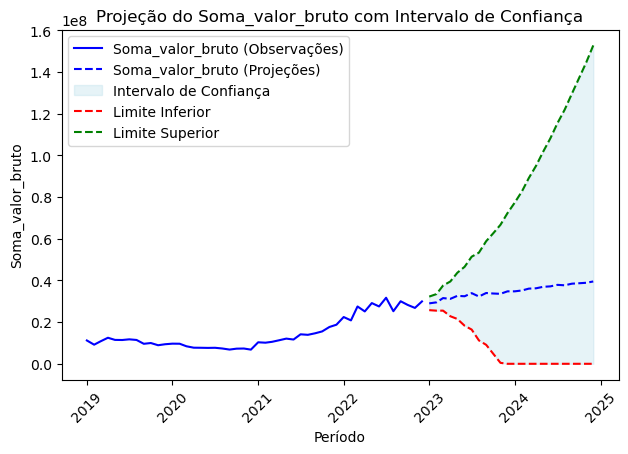

In [45]:
# Convertendo as datas para o formato datetime
df_bruto['Período'] = pd.to_datetime(df_bruto['Período'])

# Separando as observações das projeções
observacoes_bruto = df_bruto.iloc[:-24]
projecoes_bruto = df_bruto.iloc[-24:]

# Plotando as observações
plt.plot(observacoes_bruto['Período'], observacoes_bruto['Soma_valor_bruto'], color='blue', label='Soma_valor_bruto (Observações)')

# Plotando as projeções
plt.plot(projecoes_bruto['Período'], projecoes_bruto['Soma_valor_bruto'], linestyle='--', color='blue', label='Soma_valor_bruto (Projeções)')

# Preenchendo a área entre os limites inferior e superior
plt.fill_between(df_bruto['Período'], df_bruto['Limite Inferior'], df_bruto['Limite Superior'], color='lightblue', alpha=0.3, label='Intervalo de Confiança')

# Plotando os limites inferior e superior
plt.plot(df_bruto['Período'], df_bruto['Limite Inferior'], color='red', linestyle='--', label='Limite Inferior')
plt.plot(df_bruto['Período'], df_bruto['Limite Superior'], color='green', linestyle='--', label='Limite Superior')

# Adicionando legenda e rótulos dos eixos
plt.legend()
plt.xlabel('Período')
plt.ylabel('Soma_valor_bruto')
plt.title('Projeção do Soma_valor_bruto com Intervalo de Confiança')

# Girando os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [46]:
# Adicionando uma nova coluna 'Ano' ao DataFrame
df_bruto['Ano'] = df_bruto['Período'].dt.year

# Separando as projeções por ano
bruto_por_ano = df_bruto[df_bruto['Período'] > '2022-12-31']

# Agrupando as projeções por ano e calculando as somas
soma_bruto_por_ano = bruto_por_ano.groupby('Ano')['Soma_valor_bruto'].sum()
soma_limite_inferior_por_ano_bruto = bruto_por_ano.groupby('Ano')['Limite Inferior'].sum()
soma_limite_superior_por_ano_bruto = bruto_por_ano.groupby('Ano')['Limite Superior'].sum()

# Separando as projeções por ano (primeiro e segundo ano)
bruto_primeiro_ano = bruto_por_ano[bruto_por_ano['Ano'] == 2023]
bruto_segundo_ano = bruto_por_ano[bruto_por_ano['Ano'] == 2024]

# Calculando as somas do primeiro e segundo ano separadamente
soma_bruto_primeiro_ano = bruto_primeiro_ano['Soma_valor_bruto'].sum()
soma_bruto_segundo_ano = bruto_segundo_ano['Soma_valor_bruto'].sum()
soma_limite_inferior_primeiro_ano_bruto = bruto_primeiro_ano['Limite Inferior'].sum()
soma_limite_inferior_segundo_ano_bruto = bruto_segundo_ano['Limite Inferior'].sum()
soma_limite_superior_primeiro_ano_bruto = bruto_primeiro_ano['Limite Superior'].sum()
soma_limite_superior_segundo_ano_bruto = bruto_segundo_ano['Limite Superior'].sum()

# Calculando a soma total dos dois anos
soma_bruto_total = soma_bruto_por_ano.sum()
soma_limite_inferior_total_bruto = soma_limite_inferior_por_ano_bruto.sum()
soma_limite_superior_total_bruto = soma_limite_superior_por_ano_bruto.sum()

# Mostrando os resultados
print("\nSoma do Valor bruto do Primeiro Ano:", soma_bruto_primeiro_ano)
print("Soma do Valor bruto do Segundo Ano:", soma_bruto_segundo_ano)
print("\nSoma dos Limites Inferiores do Valor bruto do Primeiro Ano:", soma_limite_inferior_primeiro_ano_bruto)
print("Soma dos Limites Inferiores do Valor bruto do Segundo Ano:", soma_limite_inferior_segundo_ano_bruto)
print("\nSoma dos Limites Superiores do Valor bruto do Primeiro Ano:", soma_limite_superior_primeiro_ano_bruto)
print("Soma dos Limites Superiores do Valor bruto do Segundo Ano:", soma_limite_superior_segundo_ano_bruto)
print("\nSoma Total do Valor bruto:", soma_bruto_total)
print("Soma Total dos Limites Inferiores do Valor bruto:", soma_limite_inferior_total_bruto)
print("Soma Total dos Limites Superiores do Valor bruto:", soma_limite_superior_total_bruto)


Soma do Valor bruto do Primeiro Ano: 388378265.90568113
Soma do Valor bruto do Segundo Ano: 447325107.4069801

Soma dos Limites Inferiores do Valor bruto do Primeiro Ano: 181411635.9141289
Soma dos Limites Inferiores do Valor bruto do Segundo Ano: 0.0

Soma dos Limites Superiores do Valor bruto do Primeiro Ano: 598106386.3277422
Soma dos Limites Superiores do Valor bruto do Segundo Ano: 1355449371.296098

Soma Total do Valor bruto: 835703373.3126612
Soma Total dos Limites Inferiores do Valor bruto: 181411635.9141289
Soma Total dos Limites Superiores do Valor bruto: 1953555757.6238403


In [47]:
# Calculando a soma total de operações por ano
soma_bruto_por_ano = df_bruto.groupby('Ano')['Soma_valor_bruto'].sum()

# Calculando a taxa de crescimento percentual de um ano para o outro
taxa_crescimento_bruto = soma_bruto_por_ano.pct_change().fillna(0) * 100

# Criando o DataFrame resultado_operacoes
resultado_bruto = pd.DataFrame({
    'Ano': soma_bruto_por_ano.index,
    'Total_valor_bruto': soma_bruto_por_ano.values,
    'Taxa_de_Crescimento': taxa_crescimento_bruto.values
})

print(resultado_bruto)

    Ano  Total_valor_bruto  Taxa_de_Crescimento
0  2019       1.275951e+08             0.000000
1  2020       9.399672e+07           -26.332055
2  2021       1.606532e+08            70.913578
3  2022       3.244716e+08           101.970285
4  2023       3.883783e+08            19.695601
5  2024       4.473251e+08            15.177688


### Finalmente temos que, segundo o modelo criado, a carteira tem uma projeção de crescimento do "valor_bruto" de aproximadamente **19,7%** de 2022 para 2023 e **15,2%** de 2023 para 2024, com um total estimado de aproximadamente **R$388.378.300** no ano de 2023 e **R$447.325.100** no ano de 2024

---

## **CONCLUSÕES**

* Há uma diferença significativa sobre o total de operações e também o valor principal e valor bruto entre as categorias de operações, com destaque para a categoria "Prod";

* Segundo as previsões, há uma tendência de crescimento para os próximos 2 anos para o volume de operações, soma de valor principal e soma de valor bruto. Entretando esse taxa de crescimento tende a diminuir em comparação com os últimos 2 anos (2021 e 2022) que tiveram altas taxas de crescimento para as 3 variáveis do estudo;

* Para o cálculo da projeção de crescimento, utilizei um modelo ARIMA de séries temporais que é um algoritmo relativamente simples, mas eficiente para capturar padrões temporais e sazonalidades nos dados;

* Aqui poderiamos considerar a utilzação de outros métodos como:

         * Uma Regressão linear que tem como vantagem ser relativamente simples mas ao mesmo tempo não lida com valores sequênciais (cada observação é considerada única e sem relação com outra, que não é o caso);

        * Modelos de Suavização Exponencial: que seriam uma ótima opção também para, por exemplo, o volume de operações e a soma do valor principal, pois este modelo lida bem com mudanças abruptas ao longo do tempo (como vimos na passagem de 2020 para 2021);
        
        * Redes Neurais Recorrentes (RNN) e LSTM (Long Short-Term Memory): pode capturar padrões complexos nos dados e lidar com mais variáveis além do próprio valor que queremos prever, entretanto não serviria nesse caso pois necessita de um alto volume de dados (aqui temos apenas 48 meses de histórico). Além disso é um algoritmo muito mais complexo e demanda muito tempo para pré-processar os dados e implantar de acordo com o contexto do problema